### Creating Virtual environment and installing necssary packages

In [1]:
import sys
print(sys.executable)

c:\Users\sebam\OneDrive\Documents\Unemployment\SebInternship\.venv\Scripts\python.exe


In [2]:
# pip freeze > requirements.txt

In [3]:
# %pip install -r requirements.txt
# # Verify installations
# # pip list
# To install open .venv terminal then activate Scripts\activate then install with py -m pip install ....

### Import Libraries

In [6]:
# # Import bloomberg api
# import blpapi
# from xbbg import blp

#Load the necessary packages
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.regression.rolling import RollingOLS
import statsmodels.tsa.stattools as adfuller
from scipy.stats import shapiro
import threading

#For LSTM Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.regularizers import l2
import shap

ModuleNotFoundError: No module named 'scipy'

In [2]:
print("TensorFlow version:", tf.__version__)
print("SHAP version:", shap.__version__)


TensorFlow version: 2.17.0
SHAP version: 0.46.0


### Import Data from bloomberg - Put ino a class

In [26]:
# # Create class to pull data from bloomberg
# class BloombergPull:
#     def __init__(self, startDate, endDate):
#         self.startDate = startDate
#         self.endDate = endDate

#     def pullData(self, tickers, fields):
#         hist_tick_data = blp.bdh(tickers = tickers, flds = fields, start_date = self.startDate, end_date = self.endDate, 
#                           Per='D', Fill = 'P', Days = 'W')
#         return hist_tick_data
    
#     def saveToExcel(self):
        

In [27]:
# bp = BloombergPull(startDate = '', endDate = '')
# hist_data = bp.pullData(tickers, fields)
# #print(hist_data)

# # Adjust data if needed i.e., drop stuff
# hist_data = hist_data.drop(columns=[col for col in hist_data.columns[2:] if col[1] == 'RSI_14D'])
# # print(hist_tick_data.columns) 

In [28]:
# # Set path for csv file
# DATA_DIR = './data/'

In [29]:
# # Initial Variables
# tickers = ['SPX Index', 'USGG10YR Index', 'MRICITI Index', 'VIX Index', 'GOLDLNPM Index', 'SPGSCI Index', 'T5YIFR Index', 'AAIIBULL Index', 'MSXAMSIL Index', 'RR10HUS','CL1 COMB Comdty'] # List of tickers change as needed
# fields = ['Last_Price', 'RSI_14D'] # Adjust to what infiormation you want from the stock/index
# # tickers_RSI_14D = ['SPX Index'] # List of tickers change as needed
# # fields = ['Last_Price', 'RSI_14D'] # Adjust to what infiormation you want from the stock/index
# start_date = '2018-01-02' # Adjust to what is needed
# end_date = '2024-09-06' # Adjust to what is needed
# period = 'D' # How often you want data D = daily, Y =- yearLY ETC..
# fill = 'P' # filling for missing data N = Nan, P = previous value
# days = 'W' # Only weekday, A = all calender days, 'C' = custom holidays
# currency = 'USD' # Adjust currency if you wanted

In [30]:
# # Pulls date form bloomberg
# hist_tick_data = blp.bdh(tickers = tickers, flds = fields, start_date = start_date, end_date = end_date, 
#                          Per=period, Fill = fill, Days = days)

In [31]:
# print(type(hist_tick_data))

In [32]:
# # Drop RSI _14D
# #hist_tick_data['RSI_14D'] = hist_tick_data[('SPX Index', 'RSI_14D')]
# hist_tick_data = hist_tick_data.drop(columns=[col for col in hist_tick_data.columns[2:] if col[1] == 'RSI_14D'])
# # print("Columns after dropping 'RSI_14D':") 
# # print(hist_tick_data.columns) 

In [33]:
# #Add in MAC2
# EMA26 = hist_tick_data[('SPX Index', 'Last_Price')].ewm(span=26, adjust=False).mean()
# EMA12 = hist_tick_data[('SPX Index', 'Last_Price')].ewm(span=12, adjust=False).mean()
# MACD = EMA12 - EMA26
# SIGNAL9 = MACD.ewm(span=9, adjust=False).mean()
# MACD2 = MACD - SIGNAL9
# hist_tick_data['MACD2'] = MACD2
# #hist_tick_data.tail()


In [34]:
# # Forecasting

# # Add in forecasting periods
# forecastPeriod = 20
# lastDate = hist_tick_data.index[-1]
# forecastDates = pd.date_range(start=lastDate + pd.offsets.BDay(1), periods=forecastPeriod, freq='B')
# forecastData = pd.DataFrame(index=forecastDates)
# hist_tick_data_Forecast = pd.concat([hist_tick_data, forecastData])
# hist_tick_data_Forecast.set_index(hist_tick_data_Forecast.columns[0], inplace = False)
# hist_tick_data_Forecast.index.name = 'date'
# # pd.set_option('display.max_rows', None)
# #hist_tick_data_Forecast.head()
# hist_tick_data_Forecast.index = pd.to_datetime(hist_tick_data_Forecast.index)
# #hist_tick_data_Forecast.index
# # print(hist_tick_data_Forecast.index)
# # print(hist_tick_data_Forecast.columns[1])

# # Define the forecast values exactly matching the DataFrame columns
# forecast_values = {
#     hist_tick_data_Forecast.columns[1]: 45,
#     hist_tick_data_Forecast.columns[2]: 3.2,
#     hist_tick_data_Forecast.columns[3]: 0.6,
#     hist_tick_data_Forecast.columns[4]: 23,
#     hist_tick_data_Forecast.columns[5]: 2500,
#     hist_tick_data_Forecast.columns[6]: 510,
#     hist_tick_data_Forecast.columns[7]: 2,
#     hist_tick_data_Forecast.columns[8]: 46,
#     hist_tick_data_Forecast.columns[9]: -0.3,
#     hist_tick_data_Forecast.columns[10]: 65,
#     hist_tick_data_Forecast.columns[11]: -10
# }

# # # Collect user input for forecast values
# # print("Please enter forecast values for each column. Press Enter to skip columns without forecast values.")

# # forecast_values = {}

# # # Iterate over DataFrame columns and get user input
# # for col in hist_tick_data_Forecast.columns:
# #     if col != ('SPX Index', 'Last_Price'):  
# #         print('Last Value: ', hist_tick_data[col][-1])
# #         user_input = input(f"Enter forecast value for '{col}' (or press Enter to skip): ")
# #         if user_input.strip():  # Only add if user input is not empty
# #             try:
# #                 forecast_values[col] = float(user_input)
# #             except ValueError:
# #                 print(f"Invalid input for '{col}'. Please enter a numerical value.")

# # For each column, generate the forecast values
# for col in forecast_values.keys():
#     # Last historical value
#     last_value = hist_tick_data[col].iloc[-1]
    
#     # Target forecast value
#     target_value = forecast_values[col]
    
#     # Calculate the incremental change per period
#     increment = (target_value - last_value) / forecastPeriod
    
#     # Generate the forecast values for the forecast period
#     forecast_values_for_period = [last_value + increment * (i + 1) for i in range(forecastPeriod)]
    
#     # Update the forecast data in the DataFrame
#     hist_tick_data_Forecast[col].iloc[-forecastPeriod:] = forecast_values_for_period



# #hist_tick_data_Forecast.tail()

# # # For each column, generate the forecast values with randomness
# # std_dev = 0.5

# # for col in forecast_values.keys():
# #     # Last historical value
# #     last_value = hist_tick_data[col].iloc[-1]
    
# #     # Target forecast value
# #     target_value = forecast_values[col]
    
# #     # Calculate the incremental change per period
# #     increment = (target_value - last_value) / forecastPeriod
    
# #     # Generate the forecast values for the forecast period without randomness
# #     forecast_values_without_randomness = [
# #         last_value + increment * (i + 1) for i in range(forecastPeriod)
# #     ]
    
# #     # Calculate random adjustments
# #     random_adjustments = np.random.normal(0, std_dev, forecastPeriod)
    
# #     # Adjust forecast values to ensure final value matches the target
# #     forecast_values_with_randomness = [
# #         value + random_adjustments[i] for i, value in enumerate(forecast_values_without_randomness)
# #     ]
    
# #     # Ensure the final forecast value reaches the target value
# #     forecast_values_with_randomness[-1] = target_value
    
# #     # Update the forecast data in the DataFrame
# #     hist_tick_data_Forecast[col].iloc[-forecastPeriod:] = forecast_values_with_randomness

# print(hist_tick_data_Forecast.tail())
    

In [35]:
# # Save to csv to file
# filename = f'tick_data_{start_date}_{end_date}.csv' # change name as required
# hist_tick_data_Forecast.to_csv(DATA_DIR + filename)

### LSTM Model Begin

In [3]:
# Step 1: Import data with multi-level header
hist_tick_data_Forecast = pd.read_csv('tick_data_2018-01-02_2024-10-10_forecast.csv', header=[0, 1])

# Step 2: Rename 'Unnamed: 0' to 'Date' in the MultiIndex columns
# Create a new column MultiIndex with 'Date' as the first level
new_columns = pd.MultiIndex.from_tuples(
    [('Date', '')] + [(col[0], col[1]) for col in hist_tick_data_Forecast.columns[1:]],
    names=['Level_0', 'Level_1']
)

# Assign new column names
hist_tick_data_Forecast.columns = new_columns

# Step 3: Set 'Date' as the index
hist_tick_data_Forecast.set_index(('Date', ''), inplace=True)

# Display the first few rows to verify
print(hist_tick_data_Forecast.tail())

# Access the 'SPX Index' and 'Last_Price' column
print(hist_tick_data_Forecast[('SPX Index', 'Last_Price')])


Level_0     SPX Index            USGG10YR Index MRICITI Index  VIX Index  \
Level_1    Last_Price    RSI_14D     Last_Price    Last_Price Last_Price   
(Date, )                                                                   
01/11/2024        NaN  62.372764       4.031087      0.493528  17.507989   
04/11/2024        NaN  62.391778       4.030806      0.493935  17.457474   
05/11/2024        NaN  62.409521       4.030585      0.494234  17.412507   
06/11/2024        NaN  62.426032       4.030395      0.494445  17.372634   
07/11/2024        NaN  62.441365       4.030208      0.494592  17.337476   

Level_0    GOLDLNPM Index SPGSCI Index T5YIFR Index AAIIBULL Index  \
Level_1        Last_Price   Last_Price   Last_Price     Last_Price   
(Date, )                                                             
01/11/2024    2665.462419   543.577396     2.446688      46.266131   
04/11/2024    2667.453667   542.378040     2.448546      46.246563   
05/11/2024    2669.420239   541.177340   

In [4]:
class DataProcessing:
    def __init__(self, df):
        self.df = df

    def plotTimeSeries(self):      
        # Plot all columns in one figure
        for column in self.df.columns:
            plt.figure(figsize=(12,6))
            plt.plot(self.df.index, self.df[column], label=column)
            plt.title(f"Time Series of {column}")
        plt.show()

    def diffData(self):
        return self.df.diff()
    
    def cleanData(self, forecast_period):
        # Isolate the forecasting rows of the DataFrame
        last_20_rows = self.df.iloc[-forecast_period:]
        original_data = self.df.iloc[:-forecast_period]
        original_data = original_data.dropna()
        df_clean = pd.concat([original_data, last_20_rows])
        return df_clean
        
    # Function to test for stationarity
    def testStationarityandNormality(self):
        results = {}
        for column in self.df.columns:
            adf_result = adfuller.adfuller(self.df[column].dropna(), autolag = 'AIC')
            shapiro_result = shapiro(self.df[column].dropna())
            results[column] = {
                #'p-value (ADF)': f'{adf_result[1]:.3g}',
                'Stationary (ADF)': adf_result[1] < 0.05, # Significance Level (Change if needed)
                #'p-value (Shapiro-Wilk)': f'{shapiro_result[1]:.3g}',
                'Normal (Shapiro-Wilk)': shapiro_result[1] > 0.05 # Significance Level (Change if needed)
            }
            
        return pd.DataFrame(results).T




In [5]:
forecast_period = 20
data_process = DataProcessing(hist_tick_data_Forecast)
# data_process.plotTimeSeries()
#hist_tick_data_Forecast = data_process.diffData()
data_Forecast = data_process.cleanData(forecast_period)
# pd.set_option('display.max_rows', None)
#print(data_Forecast.tail())
#data_process.plotTimeSeries()
print(data_process.testStationarityandNormality())


                                     Stationary (ADF)  Normal (Shapiro-Wilk)
SPX Index       Last_Price                      False                  False
                RSI_14D                          True                  False
USGG10YR Index  Last_Price                      False                  False
MRICITI Index   Last_Price                       True                  False
VIX Index       Last_Price                       True                  False
GOLDLNPM Index  Last_Price                      False                  False
SPGSCI Index    Last_Price                      False                  False
T5YIFR Index    Last_Price                      False                  False
AAIIBULL Index  Last_Price                       True                  False
MSXAMSIL Index  Last_Price                       True                  False
CL1 COMB Comdty Last_Price                      False                  False
MACD2           Unnamed: 12_level_1              True                  False

### LSTM Multivariate model - can out this in another file

In [6]:
class SebLSTM:
    def __init__(self, x, y_actual, best_model_filepath, scaler=None, time_steps=10, val_size=0.2):
        self.x = x
        self.time_steps = time_steps
        self.y_actual = y_actual[self.time_steps:]
        self.best_model_filepath = best_model_filepath
        self.scaler = scaler
        self.val_size = val_size
        self.best_model = None
        self.lowest_val_loss = float('inf')
        self.lock = threading.Lock()
        
        if self.scaler:
            self.x = self.scaler.fit_transform(self.x)

        x_samples = []
        y_samples = []

        no_of_rows = len(self.x)
        for i in range(self.time_steps, no_of_rows):
            x_samples.append(self.x[i-time_steps:i])
            y_samples.append(self.x[i, 0])

        self.X_data, self.y_data = np.array(x_samples), np.array(y_samples)
        self.X_data = self.X_data.reshape(self.X_data.shape[0], self.X_data.shape[1], self.X_data.shape[2])

        self.y_data = self.y_data.reshape(self.y_data.shape[0], 1)

    def visualiseData(self, x, y):   
        # Visualizing the input and output being sent to the LSTM model
        for inp, out in zip(x[0:2], y[0:2]):
            print(inp,'-->', out)

    def splitData(self):
        self.split_index = int(len(self.X_data) * (1 - self.val_size))
        # Split data into training and validation sets
        self.X_train, self.X_val = self.X_data[:self.split_index], self.X_data[self.split_index:]
        self.y_train, self.y_val = self.y_data[:self.split_index], self.y_data[self.split_index:]
    
    def modelLSTM(self):
        # Split data
        self.splitData()

        # LSTM Model
        model = Sequential()

        # Build Model
        model.add(LSTM(units=24, return_sequences = False, input_shape=(self.X_train.shape[1], self.X_train.shape[2]))) 
        #model.add(Dropout(0.2)) # Randomly drops 20% of neurons during each training step to avoid overfitting
        #model.add(LSTM(units=24, return_sequences = False, input_shape=(self.X_train.shape[1], self.X_train.shape[2]))) 
        #model.add(Dropout(0.2)) # Randomly drops 20% of neurons during each training step to avoid overfitting
        # #model.add(LSTM(units=24, return_sequences = False))
        model.add(Dense(1)) # Predicting single value

        # Set a custom learning rate
        learning_rate = 0.0005  
        
        # Create the Adam optimizer with the custom learning rate
        adam_optimizer = Adam(learning_rate=learning_rate)
        model.compile(optimizer=adam_optimizer, loss='mse') # compiling model
        
        #Prevent Overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

        # Measuring the time taken by the model to train
        StartTime = time.time()
        
        # Fit the model with the ModelCheckpoint callback
        self.history = model.fit(
            self.X_train, self.y_train,
            validation_data=(self.X_val, self.y_val), # Validation data to monitor val_loss
            epochs=2,                     # Number of epochs to train
            batch_size=8,                  # Batch size
            verbose = 1,                  # Outputs performance at each epoch
            callbacks=[early_stopping]         # Include the ModelCheckpoint in the list of callbacks
        )

        EndTime = time.time()
        print("## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ##')

        # Assign Best model
        for epoch, val_loss in enumerate(self.history.history['val_loss']):
            if val_loss < self.lowest_val_loss:
                self.lowest_val_loss - val_loss
                self.best_model = model # Assign best model

        # Save best model
        self.save_best_model()

        # Predict on whole dataset
        train_pred = self.best_model.predict(self.X_train)
        val_pred = self.best_model.predict(self.X_val)
        # print(train_pred.shape)
        # print(self.X_train.shape)

        # Need to convert the predictions into same shape as input data to rescale the data
        temp_train_pred = np.zeros((train_pred.shape[0], self.X_train.shape[2]))
        temp_train_pred[:, 0] = train_pred.flatten() #  Makes 1D array
        temp_val_pred = np.zeros((val_pred.shape[0], self.X_val.shape[2]))
        temp_val_pred[:, 0] = val_pred.flatten() #  Makes 1D array

        train_pred_inv = self.scaler.inverse_transform(temp_train_pred)
        val_pred_inv = self.scaler.inverse_transform(temp_val_pred)

        self.y_pred = np.append(train_pred_inv[:, 0], val_pred_inv[:, 0])

    def save_best_model(self):
        with self.lock:
            try:
                self.best_model.save(self.best_model_filepath) # Keras internal savingoperation
            except Exception as e:
                print('Error Saving Best Model')

    def LSTMPerformance(self):
        # Plotting training and validation loss
        plt.figure(figsize=(10, 6))
        plt.plot(self.history.history['loss'], label='Training Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title('Training and Validation Loss over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()


    def residuals(self, y):
        residuals = self.y_actual - y
        plt.hist(residuals, bins=50)
        plt.title('Distribution of Residuals')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.show()

    def errorPercentage(self, y):
        # Convert the NumPy arrays to Pandas Series
        y_pred_series = pd.Series(y, name="Predicted")
        y_actual_series = pd.Series(self.y_actual, name="Actual")

        # Concatenate the two Series
        error = pd.concat([y_pred_series.reset_index(drop=True), y_actual_series.reset_index(drop=True)], axis=1)
        error.columns = ["Error (%)", "Actual"]

        # Calculate Error (%) as absolute percentage difference
        error["Error (%)"] = (((error["Error (%)"] - error["Actual"]) / error["Actual"]) * 100).abs()

        # Drop the 'Actual' column to keep only the error
        self.error = error.drop(["Actual"], axis=1)

        # Summarize the error statistics: mean, min, and max
        pred_error_summary = self.error.agg(['mean', 'min', 'max'])
        return pred_error_summary
    
    def errorMetrics(self, y):
        rmse = np.sqrt(mean_squared_error(self.y_actual, y))
        mae = mean_absolute_error(self.y_actual, y)

        return f"RMSE: {rmse}, MAE: {mae}"

    def plot(self, y, zoom = 0):
        if hasattr(self, 'error'):
            fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, figsize=(40,30))

            ax1.plot(y[-zoom:], color = 'green', label = 'LSTM Prediction')
            ax1.plot(self.y_actual[-zoom:], color = 'blue', label = 'Actual')
            ax1.set_title('Stock Price Predictions', fontsize=20)
            ax1.set_xlabel('Date', fontsize=16)  # X-axis label for the first plot
            ax1.set_ylabel('Stock Price', fontsize=16)  # Y-axis label for the first plot
            ax1.legend(loc="best")
            ax2.plot(self.error[-zoom:], color = 'red')
            ax2.set_title("%Error", fontsize=20)
            ax2.set_xlabel('Date')
            ax2.set_ylabel('Error (%)')

        else:
            # If error is empty, create a single plot for predictions only
            fig, ax1 = plt.subplots(figsize=(40, 15))

            # Plot LSTM predictions vs. Actual values
            ax1.plot(y[-zoom:], color='green', label='LSTM Prediction')
            ax1.plot(self.y_actual[-zoom:], color='blue', label='Actual')
            ax1.set_title('Stock Price Predictions', fontsize=20)
            ax1.set_xlabel('Date', fontsize=16)
            ax1.set_ylabel('Stock Price', fontsize=16)
            ax1.legend(loc="best")

        # Adjust the layout to make sure the labels and titles fit well
        plt.tight_layout()
        plt.show()

    def getSHAPley(self, original_columns):
        # Use GradientExplainer to calculate SHAP values for both training and validation sets
        explainer = shap.GradientExplainer(self.best_model, self.X_train)
        # explainer = shap.DeepExplainer(self.best_model, self.X_train)

        # For entire validation set
        shap_values_val = explainer.shap_values(self.X_val)
        shap_values_train = explainer.shap_values(self.X_train)

        # # Sum SHAP values over time steps
        # shap_values_sum_val = np.sum(np.abs(shap_values_val), axis=1)
        # shap_values_sum_train = np.sum(np.abs(shap_values_train), axis=1)

        # Avg SHAP values over time steps
        shap_values_sum_val = np.mean(np.abs(shap_values_val), axis=1)
        shap_values_sum_train = np.mean(np.abs(shap_values_train), axis=1)

        # Flatten the summed SHAP values for each sample in both sets
        shap_values_sum_flat_val = shap_values_sum_val.reshape(shap_values_sum_val.shape[0], -1)  # Validation
        shap_values_sum_flat_train = shap_values_sum_train.reshape(shap_values_sum_train.shape[0], -1)  # Training

        # Convert to DataFrame with features as columns
        self.feature_contributions_val = pd.DataFrame(shap_values_sum_flat_val, columns=original_columns)
        self.feature_contributions_train = pd.DataFrame(shap_values_sum_flat_train, columns=original_columns)

    def featureImportance(self, feature_contributions_val, feature_contributions_train):
        # Calculate average SHAP values
        avg_shap_values_val = feature_contributions_val.mean().values
        
        # Flatten feature names from tuples to strings
        feature_names = [' '.join(name) for name in feature_contributions_val.columns.tolist()]  # Joining tuple elements

        # Create a DataFrame for sorting for both sets
        importance_df_val = pd.DataFrame({
            'Feature': feature_names,
            'Average SHAP Value': avg_shap_values_val
        }).sort_values(by='Average SHAP Value', ascending=True)

        if not feature_contributions_train.empty: 
            avg_shap_values_train = feature_contributions_train.mean().values
            importance_df_train = pd.DataFrame({
                'Feature': feature_names,
                'Average SHAP Value': avg_shap_values_train
            }).sort_values(by='Average SHAP Value', ascending=True)

            # Plotting both Validation and Training Feature Importance side by side
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

            # Validation Set Plot
            ax1.barh(importance_df_val['Feature'], importance_df_val['Average SHAP Value'], color='skyblue')
            ax1.set_xlabel('Average SHAP Value')
            ax1.set_title('Validation Set Feature Importance based on SHAP Values')
            ax1.axvline(0, color='black', linewidth=0.5, linestyle='--')
            ax1.grid(axis='x', linestyle='--', alpha=0.7)

            # Training Set Plot
            ax2.barh(importance_df_train['Feature'], importance_df_train['Average SHAP Value'], color='lightgreen')
            ax2.set_xlabel('Average SHAP Value')
            ax2.set_title('Training Set Feature Importance based on SHAP Values')
            ax2.axvline(0, color='black', linewidth=0.5, linestyle='--')
            ax2.grid(axis='x', linestyle='--', alpha=0.7)

            plt.tight_layout()
            plt.show()

        else:
            # Plotting Feature Importance
            plt.figure(figsize=(10, 6))
            plt.barh(importance_df_val['Feature'], importance_df_val['Average SHAP Value'], color='skyblue')
            plt.xlabel('Average SHAP Value')
            plt.title('Feature Importance based on SHAP Values for Forecasting')
            plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
            plt.grid(axis='x', linestyle='--', alpha=0.7)

            plt.show()

    # Visulaise LSTM Cell - add in later 

    # Forecasting
    # Retrain Model on most recent data
    def retrainForecastingModel(self, recentData = 0):
        self.forecast_model = load_model(self.best_model_filepath)

        self.X_retrain, self.y_retrain = self.X_val[-recentData:], self.y_val[-recentData:]
        self.forecast_model.fit(
            self.X_retrain, self.y_retrain,
            epochs=2,  
            batch_size=8,
            verbose=1
        )

    # Forecast using retrained model
    def LSTMForecast(self, xf, original_columns):
        input_data = self.scaler.transform(xf)
        input_data = np.array(input_data)
        #print(input_data.shape)
        prev_days = input_data[:self.time_steps]
        prev_days = prev_days.reshape(1, self.time_steps, prev_days.shape[1])

        y_forecast = []
        shap_values_list = []
        explainer = shap.GradientExplainer(self.forecast_model, self.X_retrain)

        for i in range(self.time_steps, len(input_data)):
            y_next = self.forecast_model.predict(prev_days)
            y_forecast.append(y_next[0,0])
            input_data[i, 0] = y_next[0,0]

            # Find SHAPley values
            shap_values = explainer.shap_values(prev_days)
            #shap_values_sum = np.sum(np.abs(shap_values), axis=1)
            shap_values_sum = np.mean(np.abs(shap_values), axis=1)
            shap_values_list.append(shap_values_sum)
            #print(shap_values_list)
            #print(shap_values_list.shape)

            # Create the new input data for the next prediction
            new_row = input_data[i].reshape((1, 1, input_data.shape[1]))  # Reshape new row for LSTM
            prev_days = np.append(prev_days[:, 1:, :], new_row, axis=1) 
            #print(prev_days)

        temp_forecast_pred = np.zeros((len(y_forecast), input_data.shape[1]))
        temp_forecast_pred[:, 0] = y_forecast
        forecast_pred_inv = self.scaler.inverse_transform(temp_forecast_pred)
        self.y_forecast = np.array(forecast_pred_inv[:,0])
             
        # Convert to DataFrame with features as columns
        shap_values_array = np.array(shap_values_list)
        # Reshape to (20, 12) by removing the unnecessary dimensions
        shap_values_array = shap_values_array.reshape(shap_values_array.shape[0], -1)
        #print(shap_values_array.shape)
        #shap_values_list = shap_values_list.reshape(shap_values_list.shape[0], -1)  
        self.feature_contributions = pd.DataFrame(shap_values_array, columns=original_columns)


In [14]:
time_steps = 30
scaler = MinMaxScaler(feature_range=(0,1))
#scaler = StandardScaler()
x = data_Forecast[:-forecast_period]
y_actual = x[('SPX Index', 'Last_Price')]
x_forecast = data_Forecast[-forecast_period-time_steps:]
# x = x.drop([('SPX Index', 'Last_Price')],axis=1)
# x_forecast = x_forecast.drop([('SPX Index', 'Last_Price')],axis=1)
no_of_model_iterations = 1
threads = []
model_instances = {}
for i in range(no_of_model_iterations):
    name = f"model_LSTM_{i}"
    model_LSTM = SebLSTM(x, y_actual, f"model_LSTM_{i}.keras", scaler=scaler, time_steps=time_steps, val_size=0.05)
    model_instances[name] = model_LSTM
    t = threading.Thread(target=model_instances[name].modelLSTM, daemon=True)
    threads.append(t)
    t.start()

for t in threads:
    t.join()

Epoch 1/50
Epoch 1/50


c:\Users\sebam\OneDrive\Documents\Unemployment\SebInternship\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\sebam\OneDrive\Documents\Unemployment\SebInternship\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\sebam\OneDrive\Documents\Unemployment\SebInternship\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


c:\Users\sebam\OneDrive\Documents\Unemployment\SebInternship\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


c:\Users\sebam\OneDrive\Documents\Unemployment\SebInternship\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0974 - val_loss: 0.0246
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0506 - val_loss: 0.0124
 72/207 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0188 - val_loss: 0.0105
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0047 - val_loss: 0.0215
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0964 - val_loss: 0.0176
167/207 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0018 - val_loss: 0.0047
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.1447 - val_loss: 0.0230
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0012 - val_loss: 0.0046
 74/207 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0027 - val_loss: 0.0243
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - los

### Forecasting

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.9565e-04  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1205e-04 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5826e-04 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.7214e-04 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.3221e-04
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1933e-04 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1435e-04 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6723e-04 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8022e-04 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2857e-04 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3629e-04 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2081e-04 
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3555e-04 
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

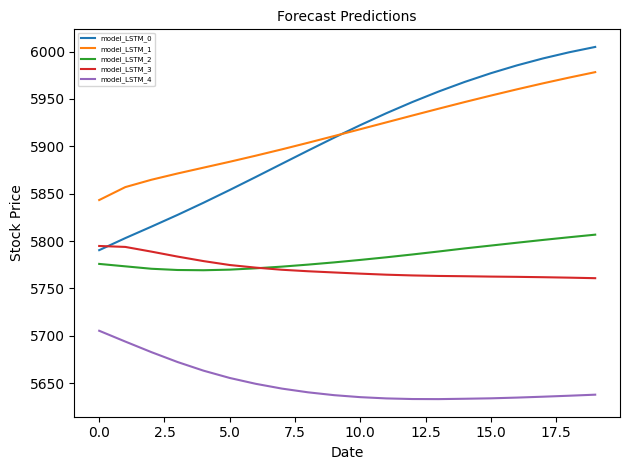

In [18]:
retrain_idx = 30
if retrain_idx > len(model_LSTM.X_val):
    print(f'Please Enter Retrain Index < Validation Set i.e., < {len(model_LSTM.X_val)}')
for name in model_instances:
    model_instances[name].retrainForecastingModel(recentData=retrain_idx)
    model_instances[name].LSTMForecast(x_forecast, hist_tick_data_Forecast.columns)
    plt.plot(model_instances[name].y_forecast, label=name)
    
# Title and labels for the combined plot
plt.title('Forecast Predictions', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Stock Price', fontsize=10)
plt.legend(loc="best", fontsize=5)
plt.tight_layout()  # Adjust the layout to fit labels and titles
plt.show()

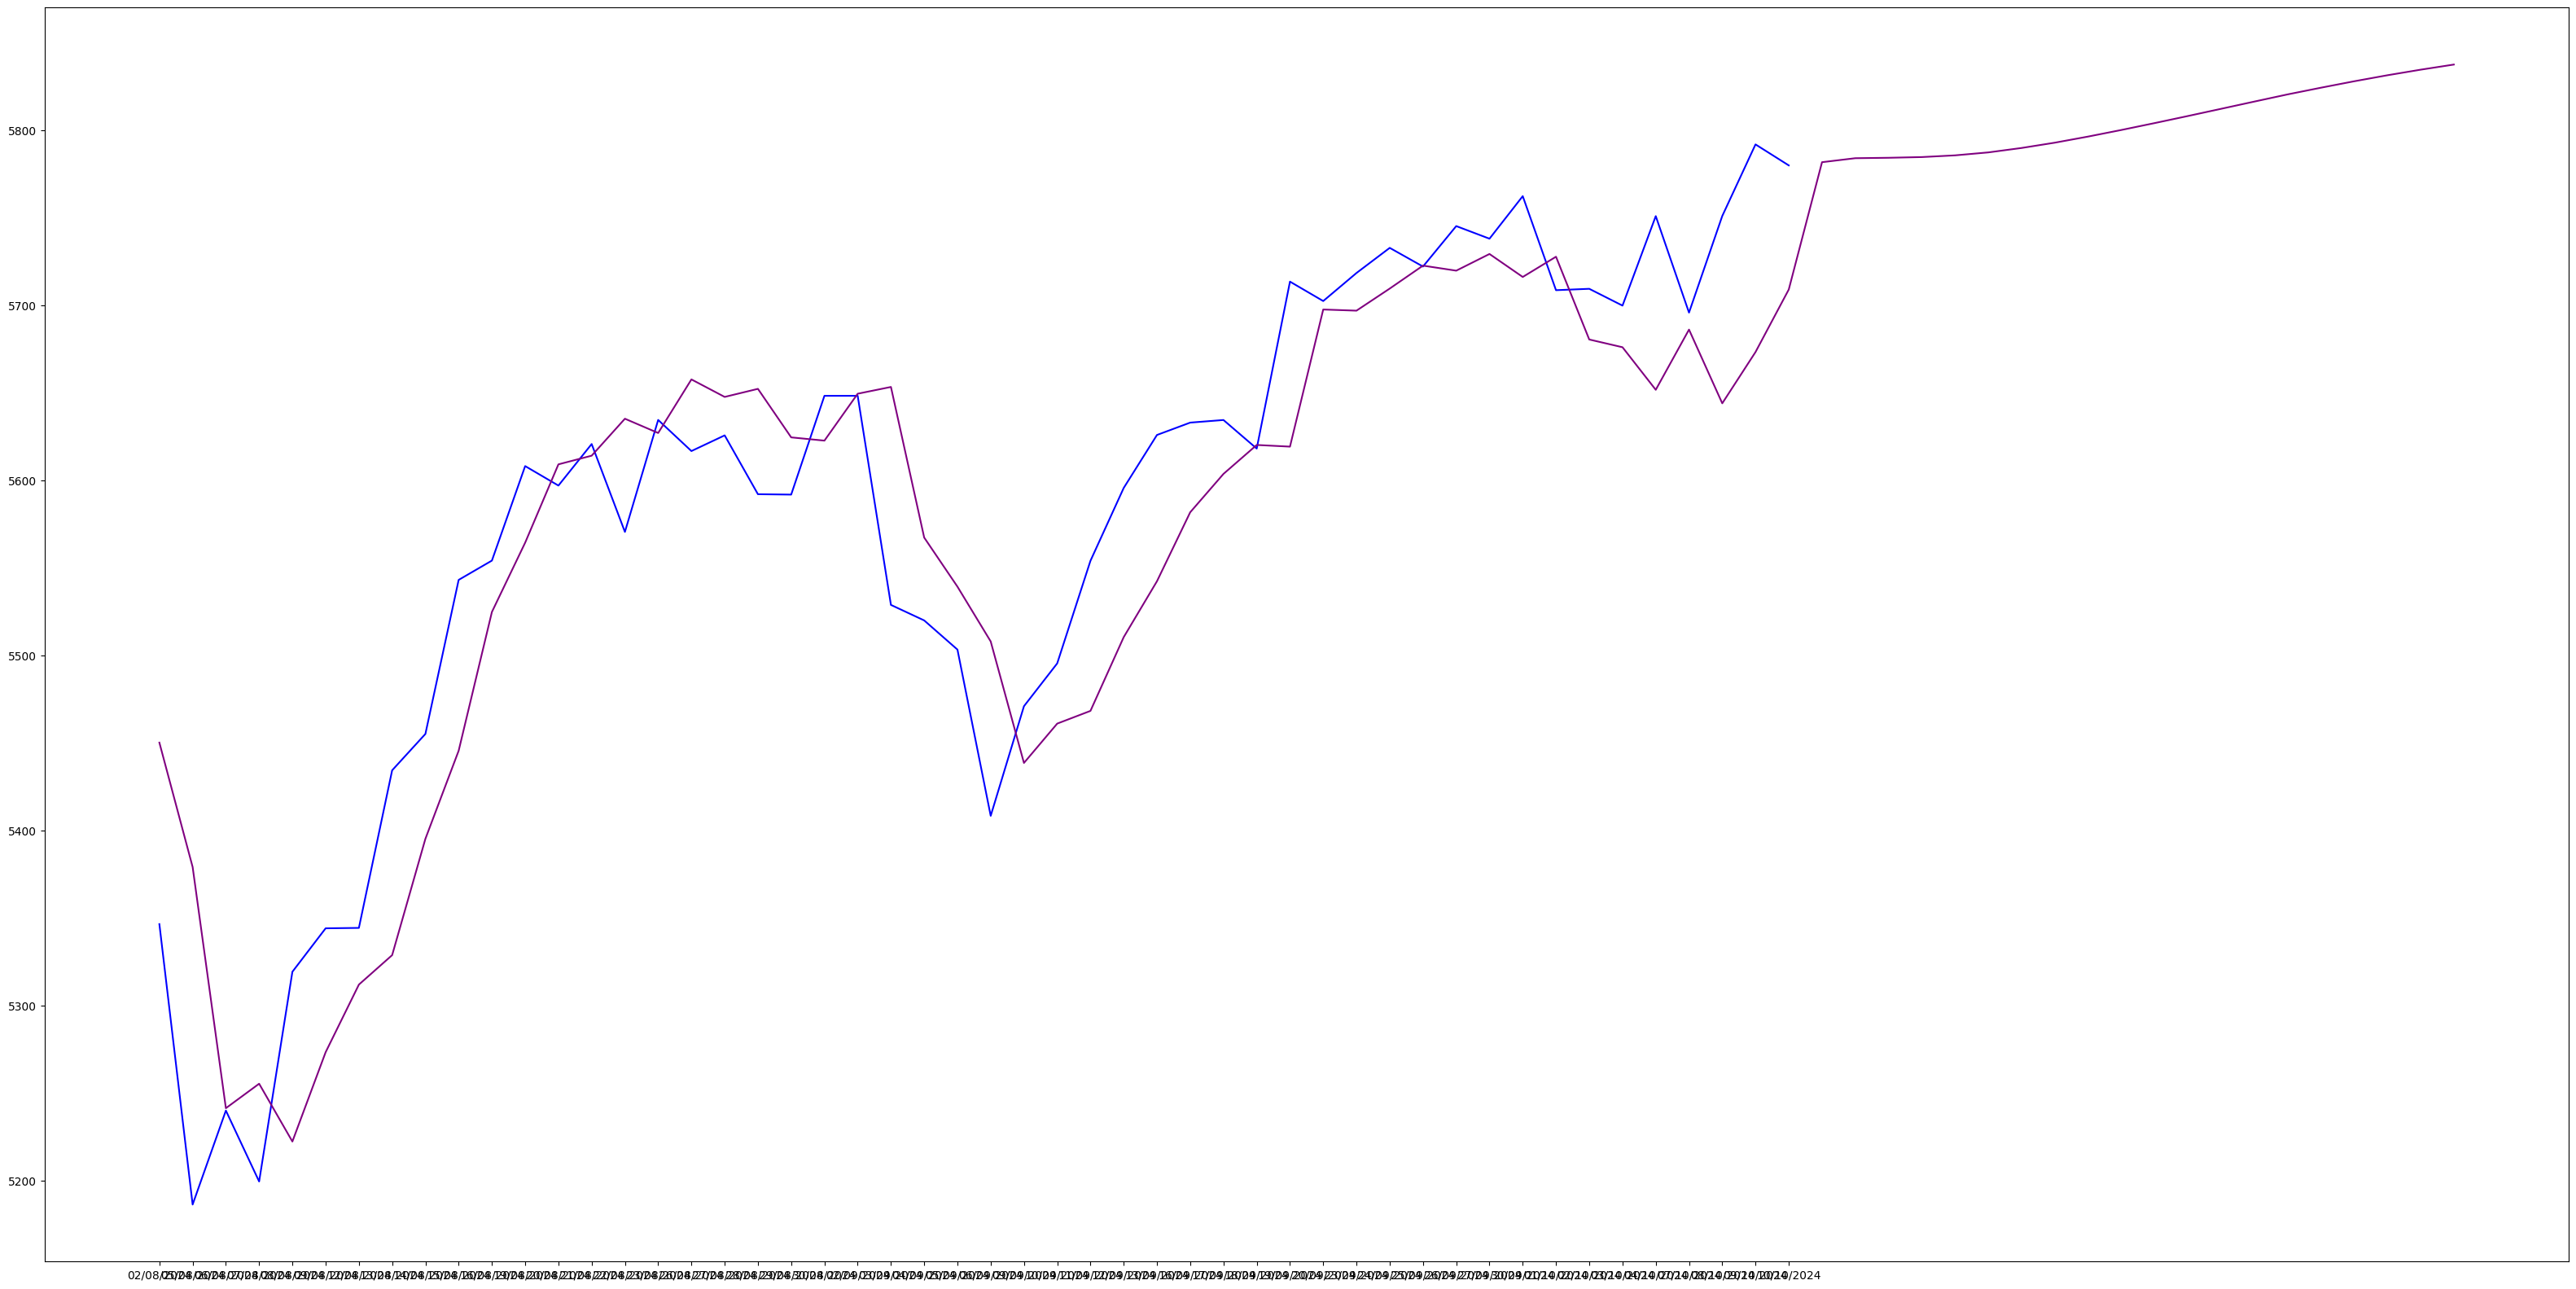

The Predicted value in 20 days is: 5837.664828306199


In [28]:
# Average Prediction Plot
zoom = 50
mean_y_forecast = np.mean([model_instance.y_forecast for model_instance in model_instances.values()], axis=0)
# print(mean_y_forecast)
mean_y_pred = np.mean([model_instance.y_pred for model_instance in model_instances.values()], axis=0)
#print(mean_y_pred)
y = np.append(mean_y_pred, mean_y_forecast)
plt.figure(figsize=(40, 20))
plt.plot(model_LSTM.y_actual[-zoom:], label='Actual', color='blue')
plt.plot(y[-zoom-forecast_period:], label='Forecast', color='purple')
plt.show()
print(f'The Predicted value in {forecast_period} days is: {y[-1]}')

### Training Model Analysis

*Average Error Analysis*

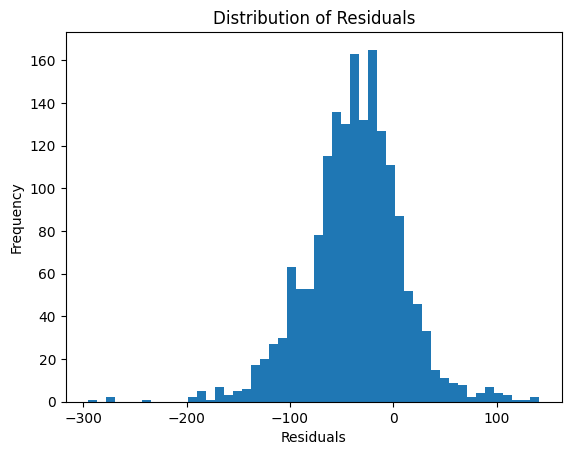

      Error (%)
mean   1.279025
min    0.000245
max   11.895743

RMSE: 59.906536757353194, MAE: 47.054859343047326


In [25]:
# Average results
model_LSTM.residuals(mean_y_pred)
print(model_LSTM.errorPercentage(mean_y_pred))
print(f'\n{model_LSTM.errorMetrics(mean_y_pred)}')

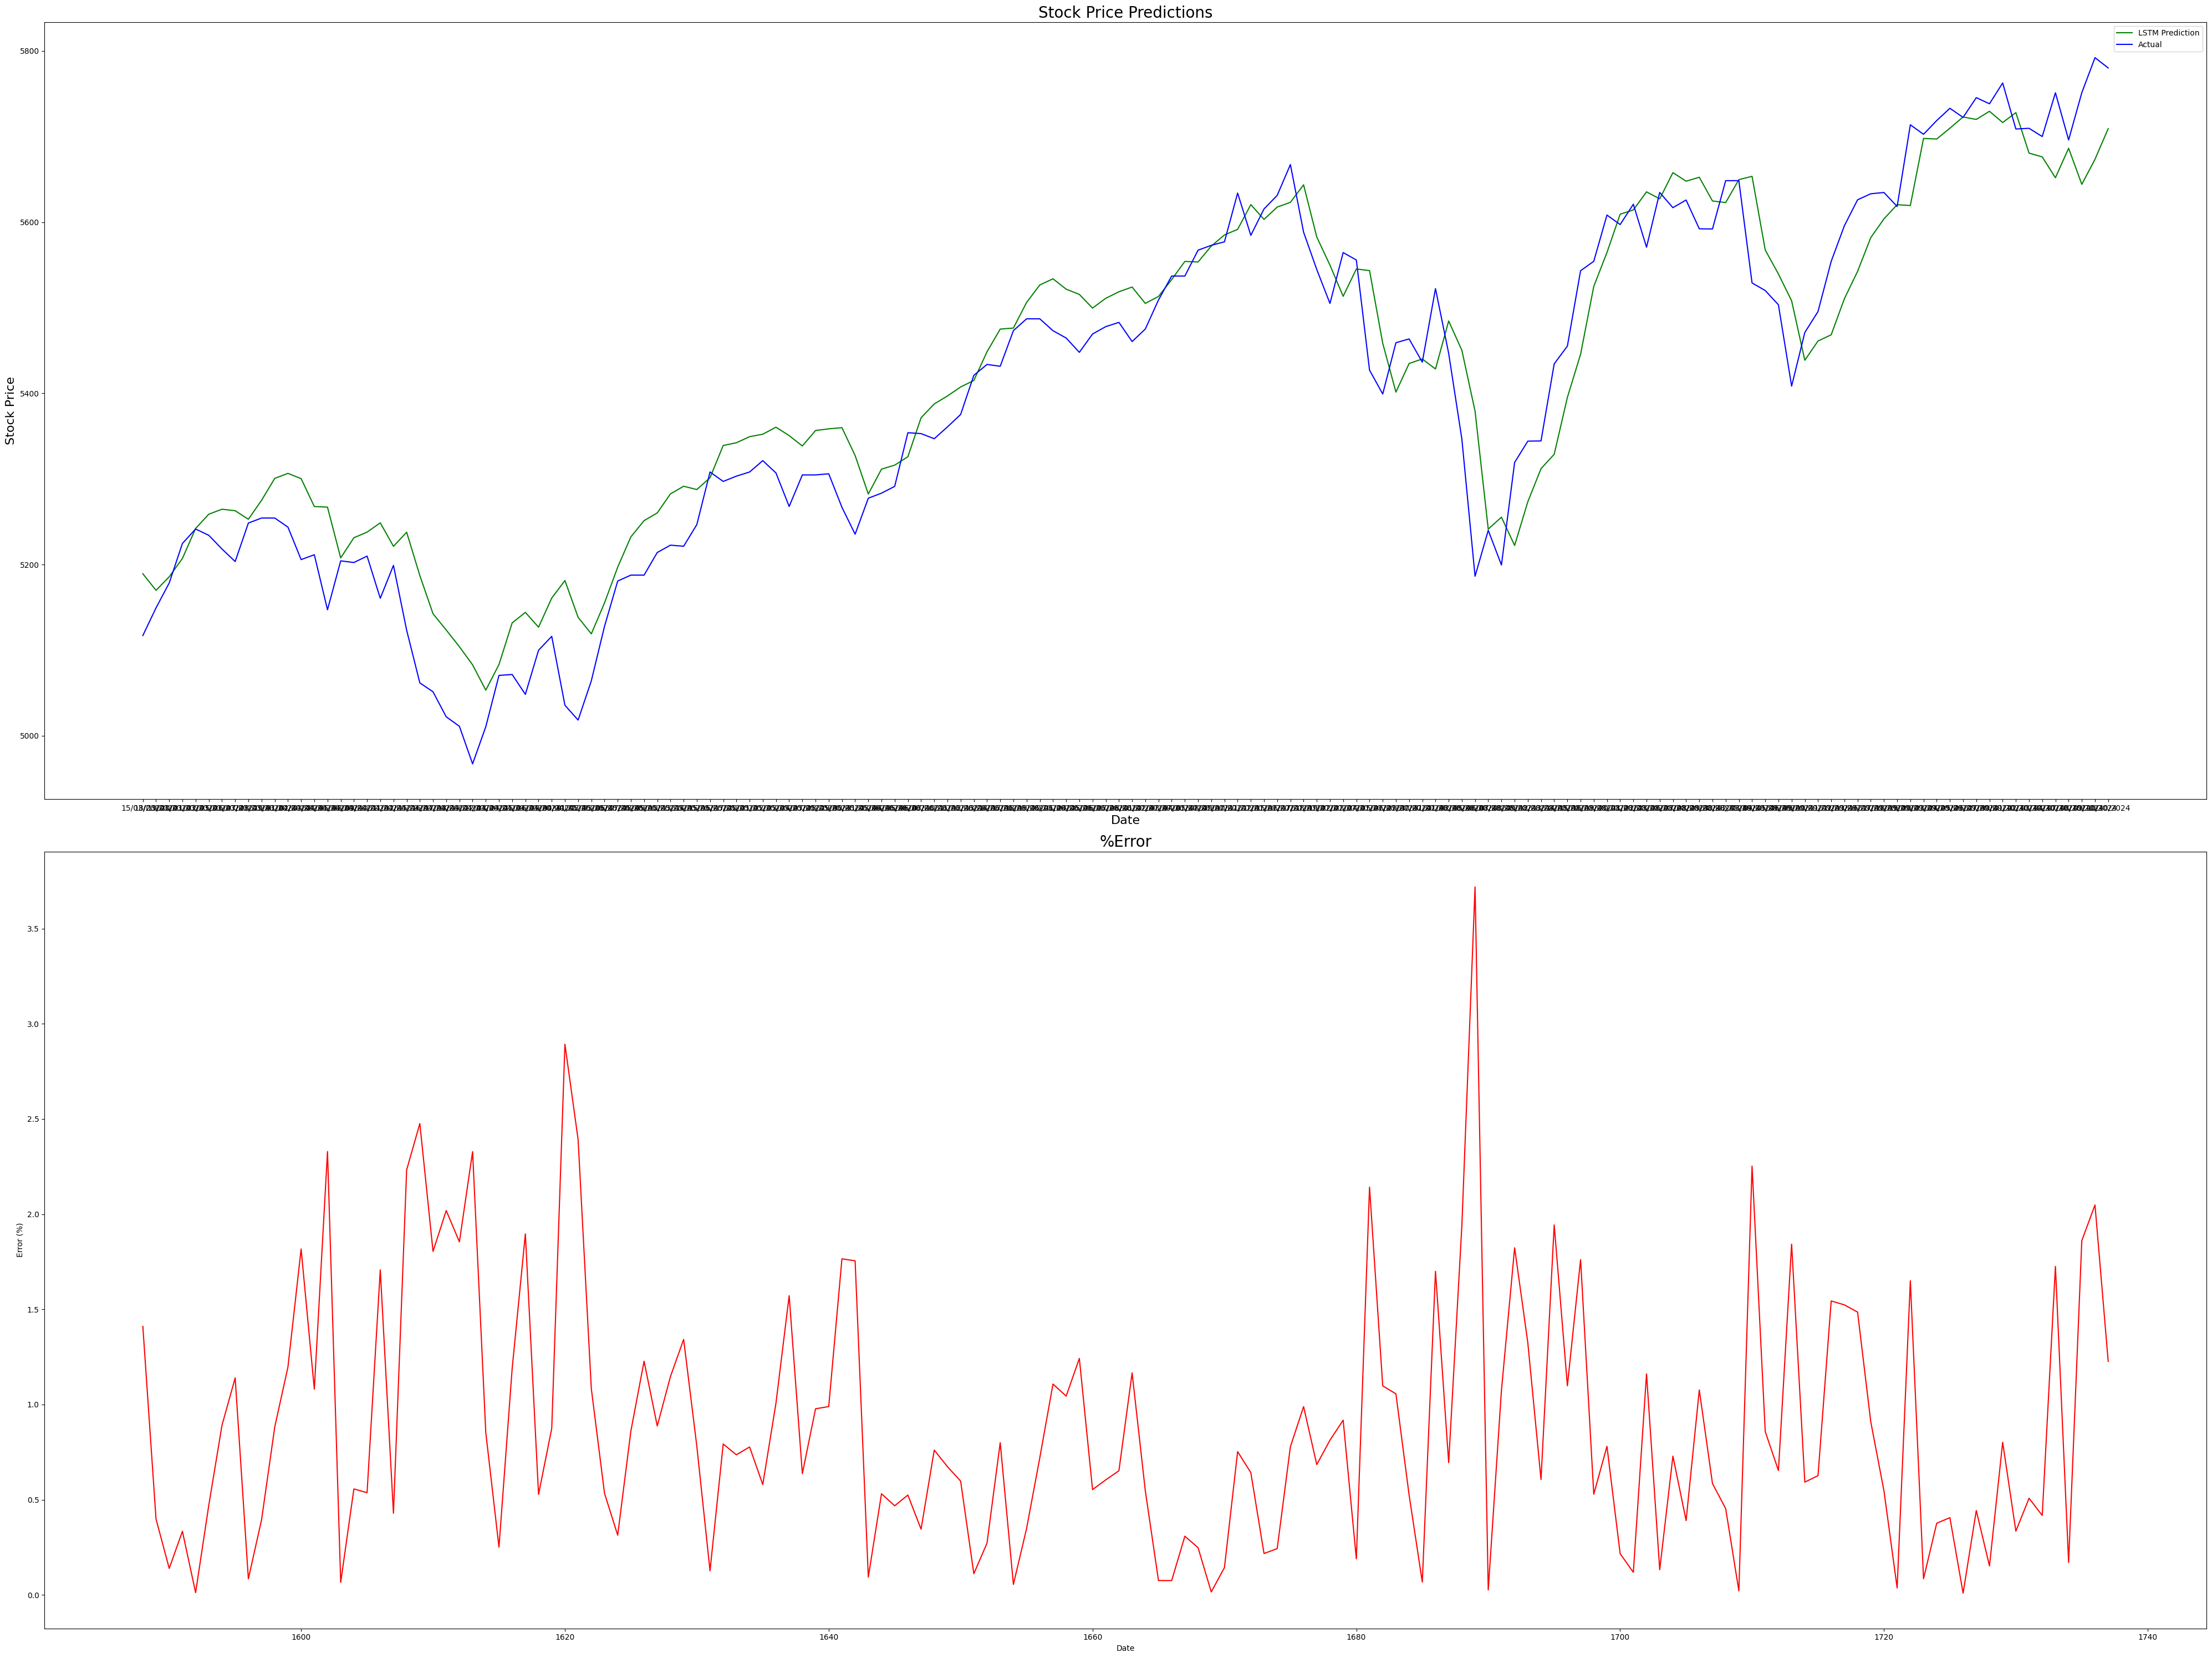

In [26]:
# Plot Average result - put zoom = 0 to see full view
zoom = 150
model_LSTM.plot(mean_y_pred, zoom=zoom)

*Individual Model Error Analysis*

model_LSTM_0


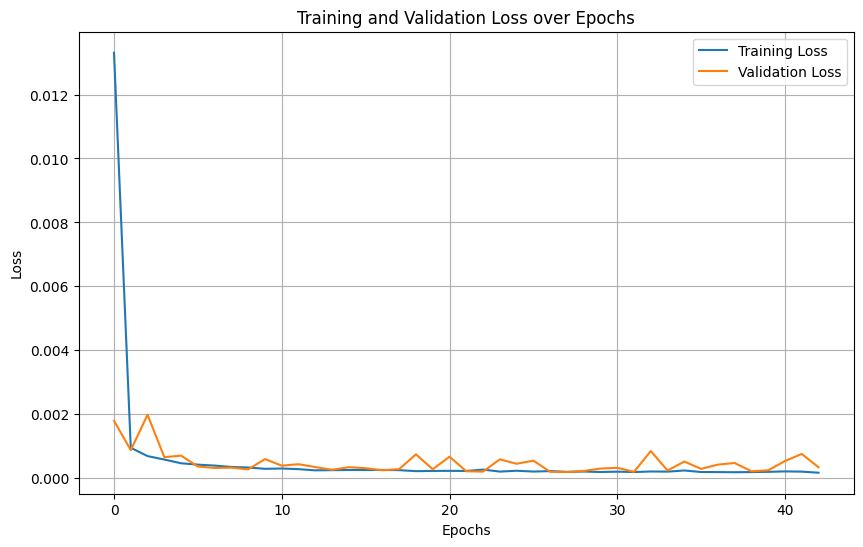

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24)             │         3,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,733 (41.93 KB)

 Trainable params: 3,577 (13.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,156 (27.96 KB)

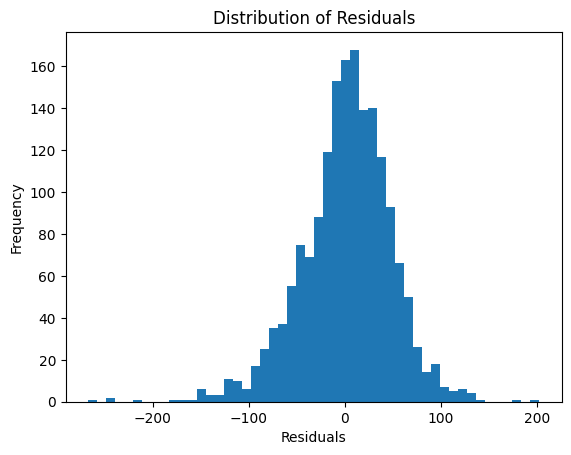

      Error (%)
mean   0.992355
min    0.002529
max   10.774865

RMSE: 47.49111168358524, MAE: 35.84759546514687
----------------------------------------------------------------
model_LSTM_1


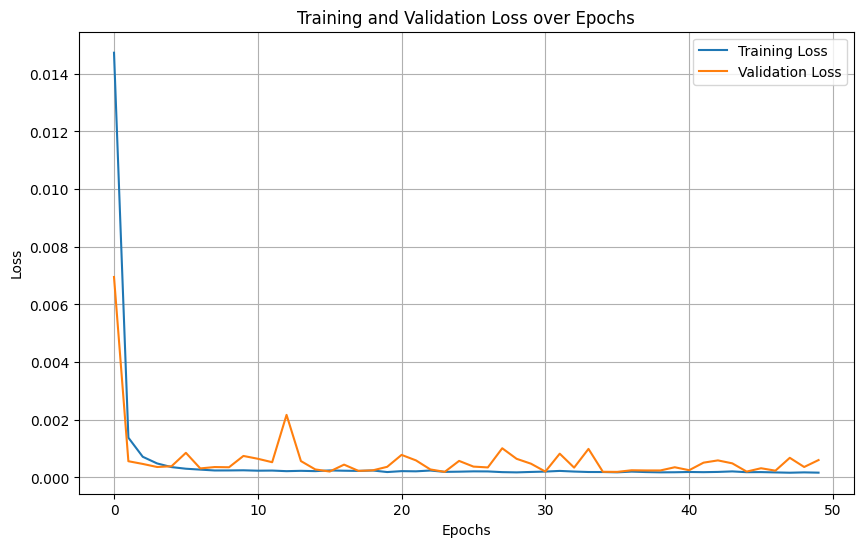

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24)             │         3,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,733 (41.93 KB)

 Trainable params: 3,577 (13.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,156 (27.96 KB)

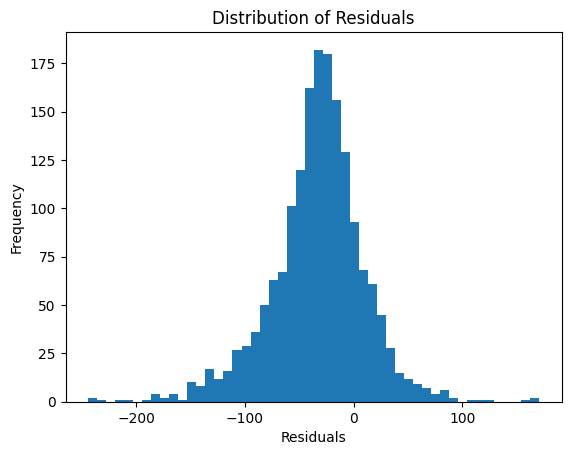

      Error (%)
mean   1.161248
min    0.000218
max    9.556514

RMSE: 54.69966844231686, MAE: 42.429172005974316
----------------------------------------------------------------
model_LSTM_2


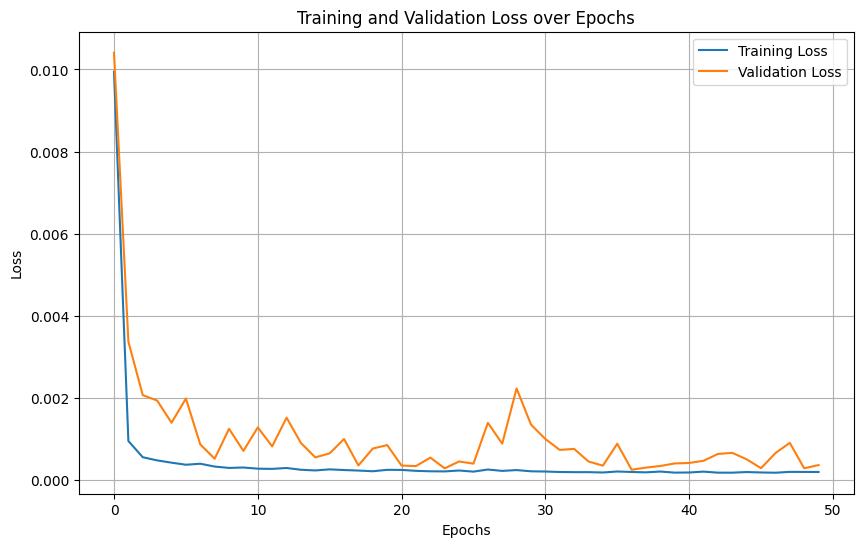

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24)             │         3,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,733 (41.93 KB)

 Trainable params: 3,577 (13.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,156 (27.96 KB)

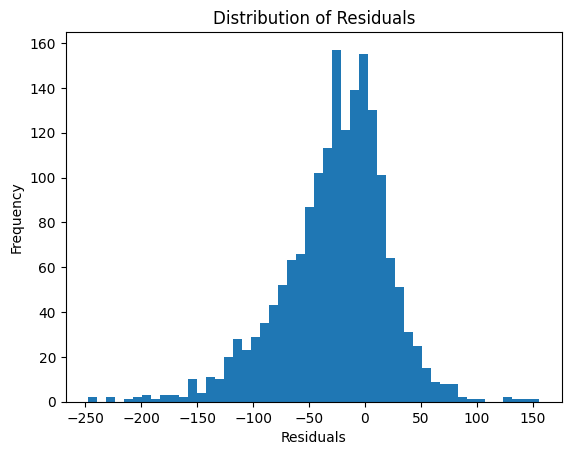

      Error (%)
mean   1.062131
min    0.000461
max    9.971930

RMSE: 54.55229713192327, MAE: 39.987249958984776
----------------------------------------------------------------
model_LSTM_3


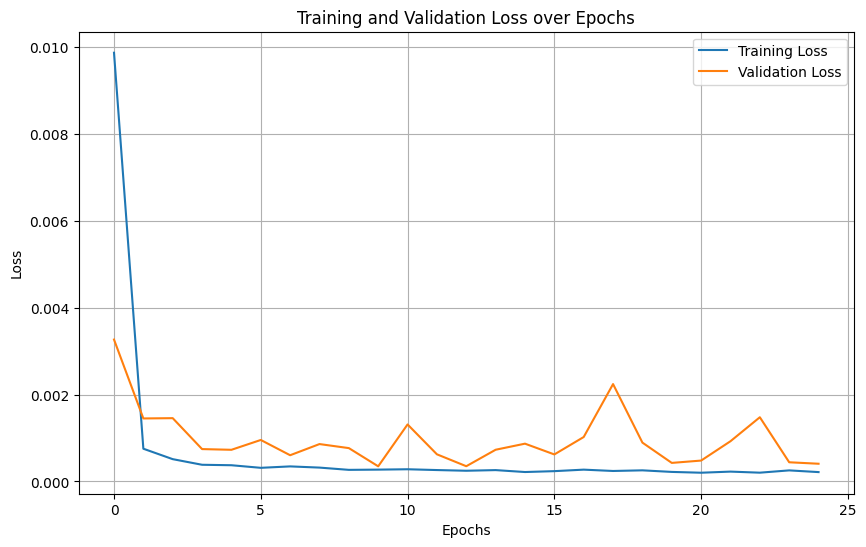

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24)             │         3,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,733 (41.93 KB)

 Trainable params: 3,577 (13.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,156 (27.96 KB)

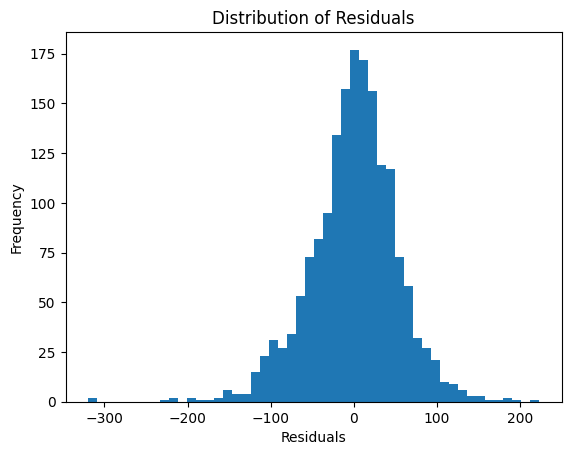

      Error (%)
mean   1.089120
min    0.000417
max   13.392232

RMSE: 53.29334270708761, MAE: 39.759263478110995
----------------------------------------------------------------
model_LSTM_4


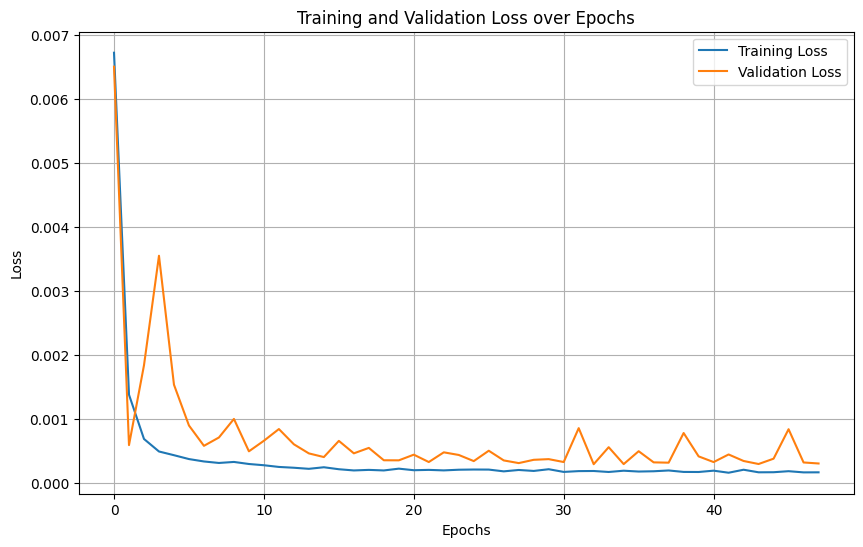

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24)             │         3,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,733 (41.93 KB)

 Trainable params: 3,577 (13.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,156 (27.96 KB)

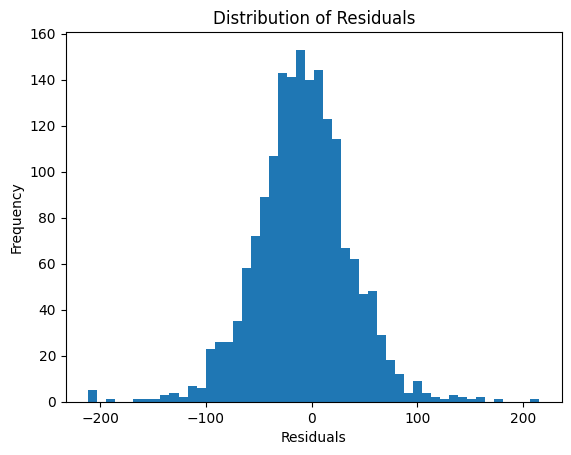

      Error (%)
mean   0.957180
min    0.000161
max    8.542705

RMSE: 45.605272769204014, MAE: 34.610983756027416
----------------------------------------------------------------
model_LSTM_5


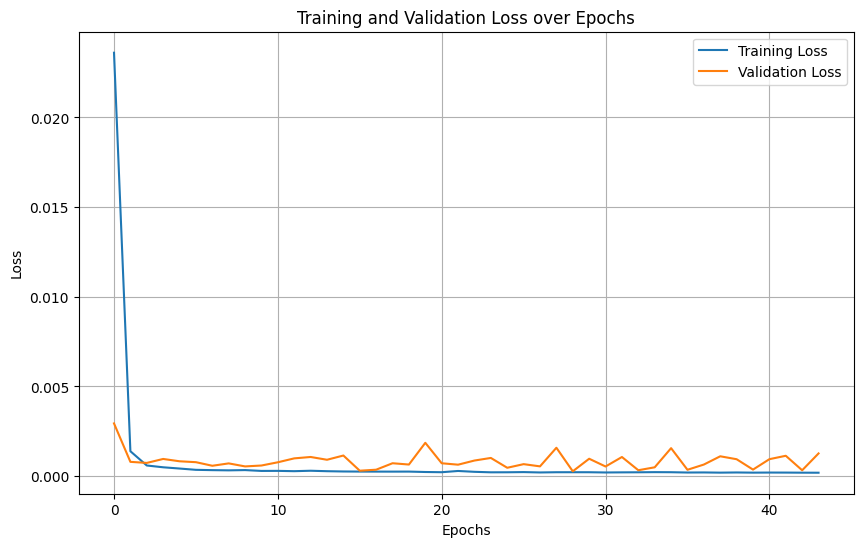

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24)             │         3,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,733 (41.93 KB)

 Trainable params: 3,577 (13.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,156 (27.96 KB)

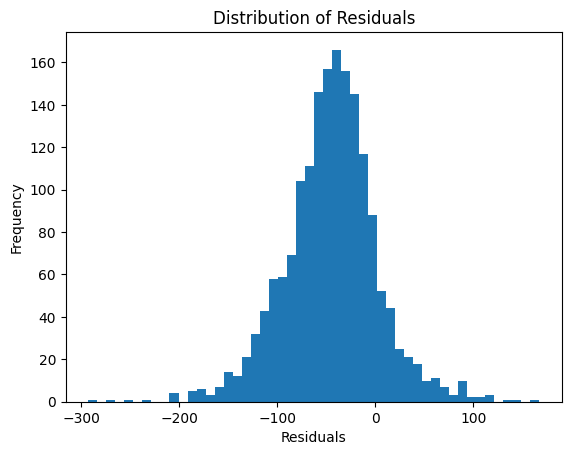

      Error (%)
mean   1.448477
min    0.001637
max   11.804783

RMSE: 65.96621279753906, MAE: 53.53905189205382
----------------------------------------------------------------
model_LSTM_6


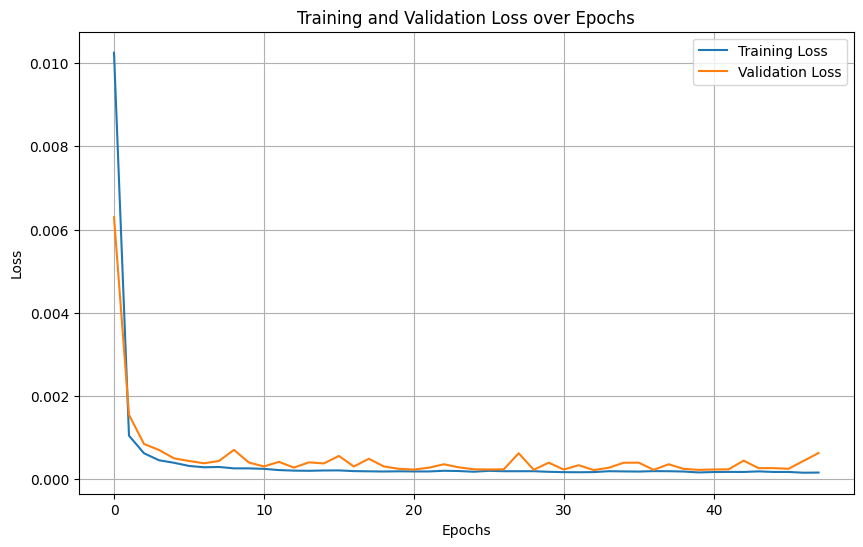

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24)             │         3,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,733 (41.93 KB)

 Trainable params: 3,577 (13.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,156 (27.96 KB)

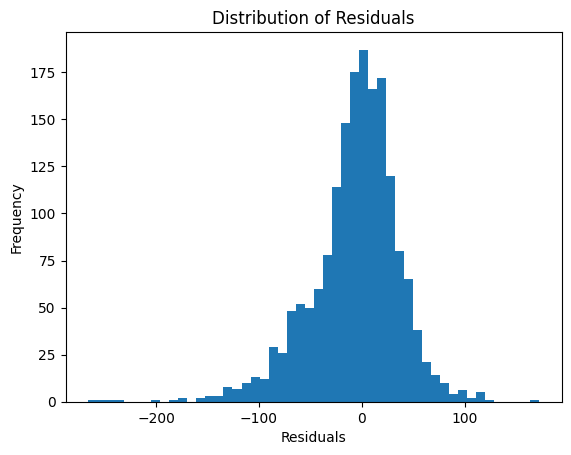

      Error (%)
mean   0.865286
min    0.000329
max   10.741124

RMSE: 43.829713299203064, MAE: 31.65054820383209
----------------------------------------------------------------
model_LSTM_7


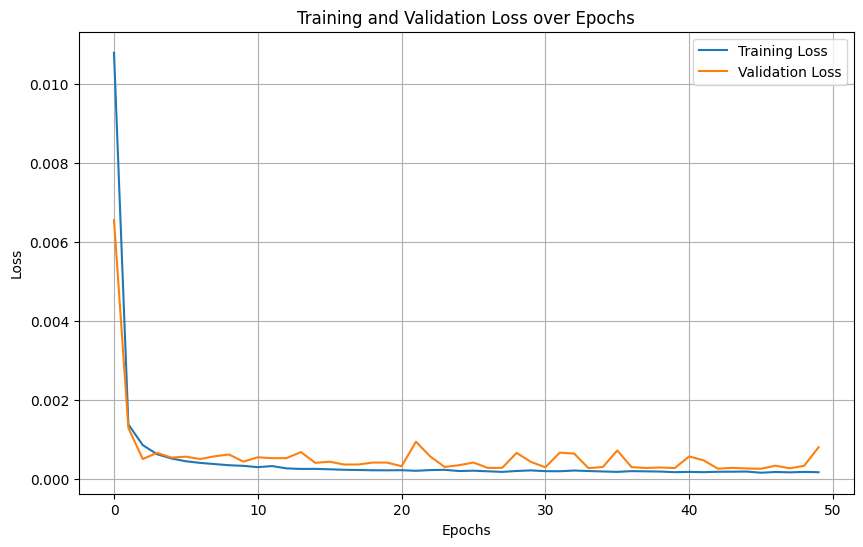

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24)             │         3,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,733 (41.93 KB)

 Trainable params: 3,577 (13.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,156 (27.96 KB)

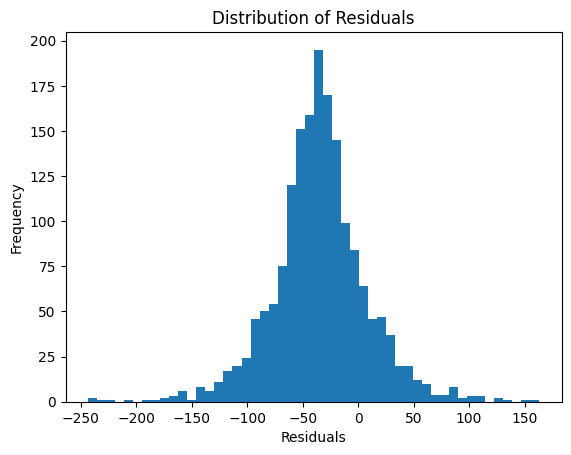

      Error (%)
mean   1.254961
min    0.000352
max    9.950874

RMSE: 55.405398780801114, MAE: 44.87239994879054
----------------------------------------------------------------
model_LSTM_8


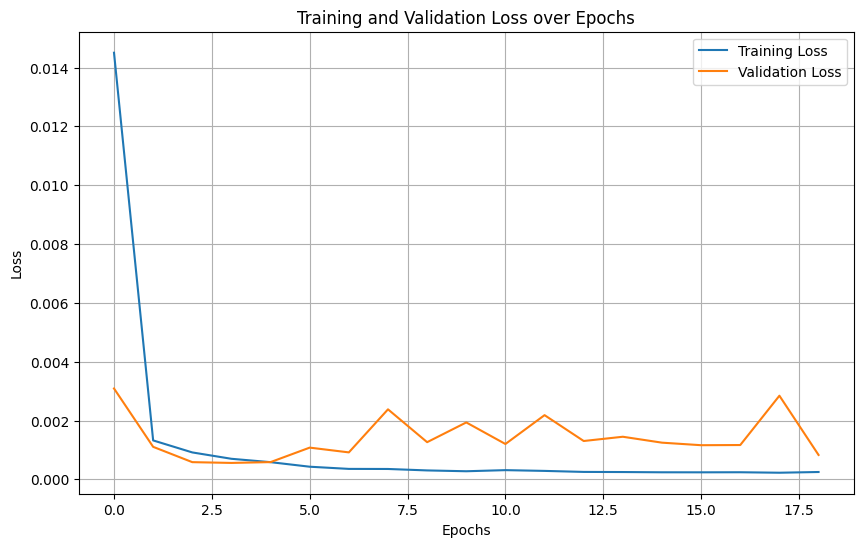

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24)             │         3,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,733 (41.93 KB)

 Trainable params: 3,577 (13.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,156 (27.96 KB)

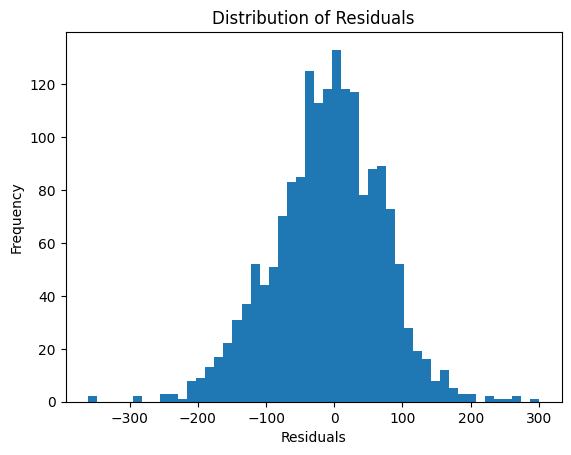

      Error (%)
mean   1.720483
min    0.001052
max   14.544649

RMSE: 80.02162910096744, MAE: 62.10397062892383
----------------------------------------------------------------
model_LSTM_9


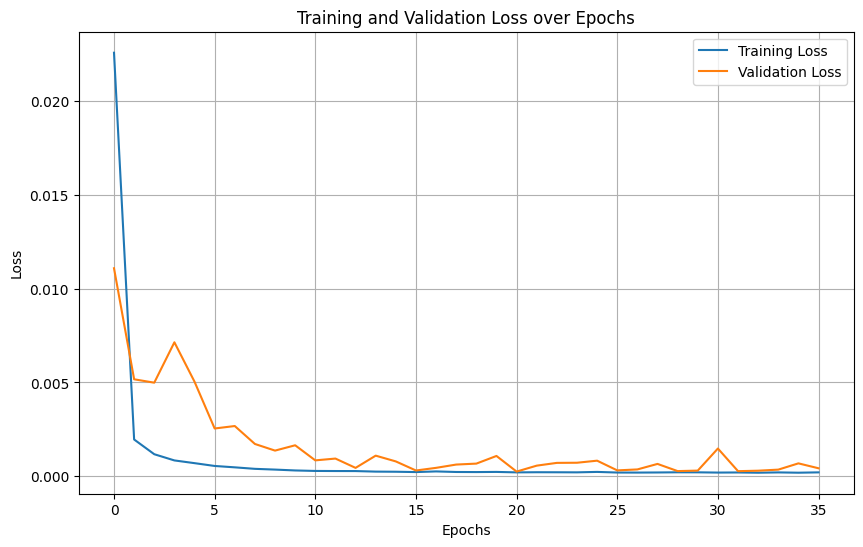

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24)             │         3,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,733 (41.93 KB)

 Trainable params: 3,577 (13.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,156 (27.96 KB)

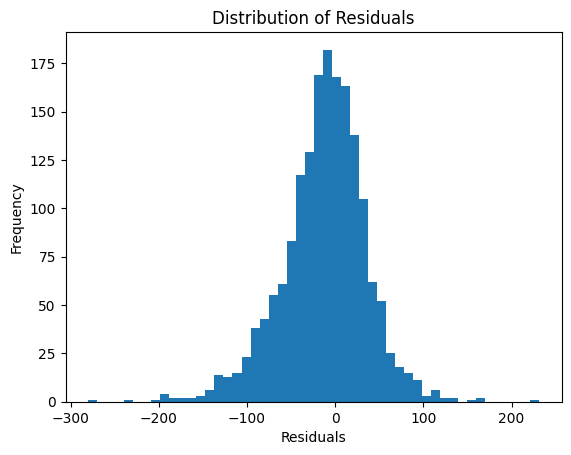

      Error (%)
mean   0.995678
min    0.000561
max    9.272620

RMSE: 50.039878666824386, MAE: 37.0338065667043
----------------------------------------------------------------


In [45]:
# Check Performance of each thread
for name in model_instances:
    print(name)
    model_instances[name].LSTMPerformance()
    model_instances[name].best_model.summary()
    model_LSTM.residuals(model_instances[name].y_pred)
    print(model_instances[name].errorPercentage(model_instances[name].y_pred))
    print(f'\n{model_instances[name].errorMetrics(model_instances[name].y_pred)}')
    print('----------------------------------------------------------------')

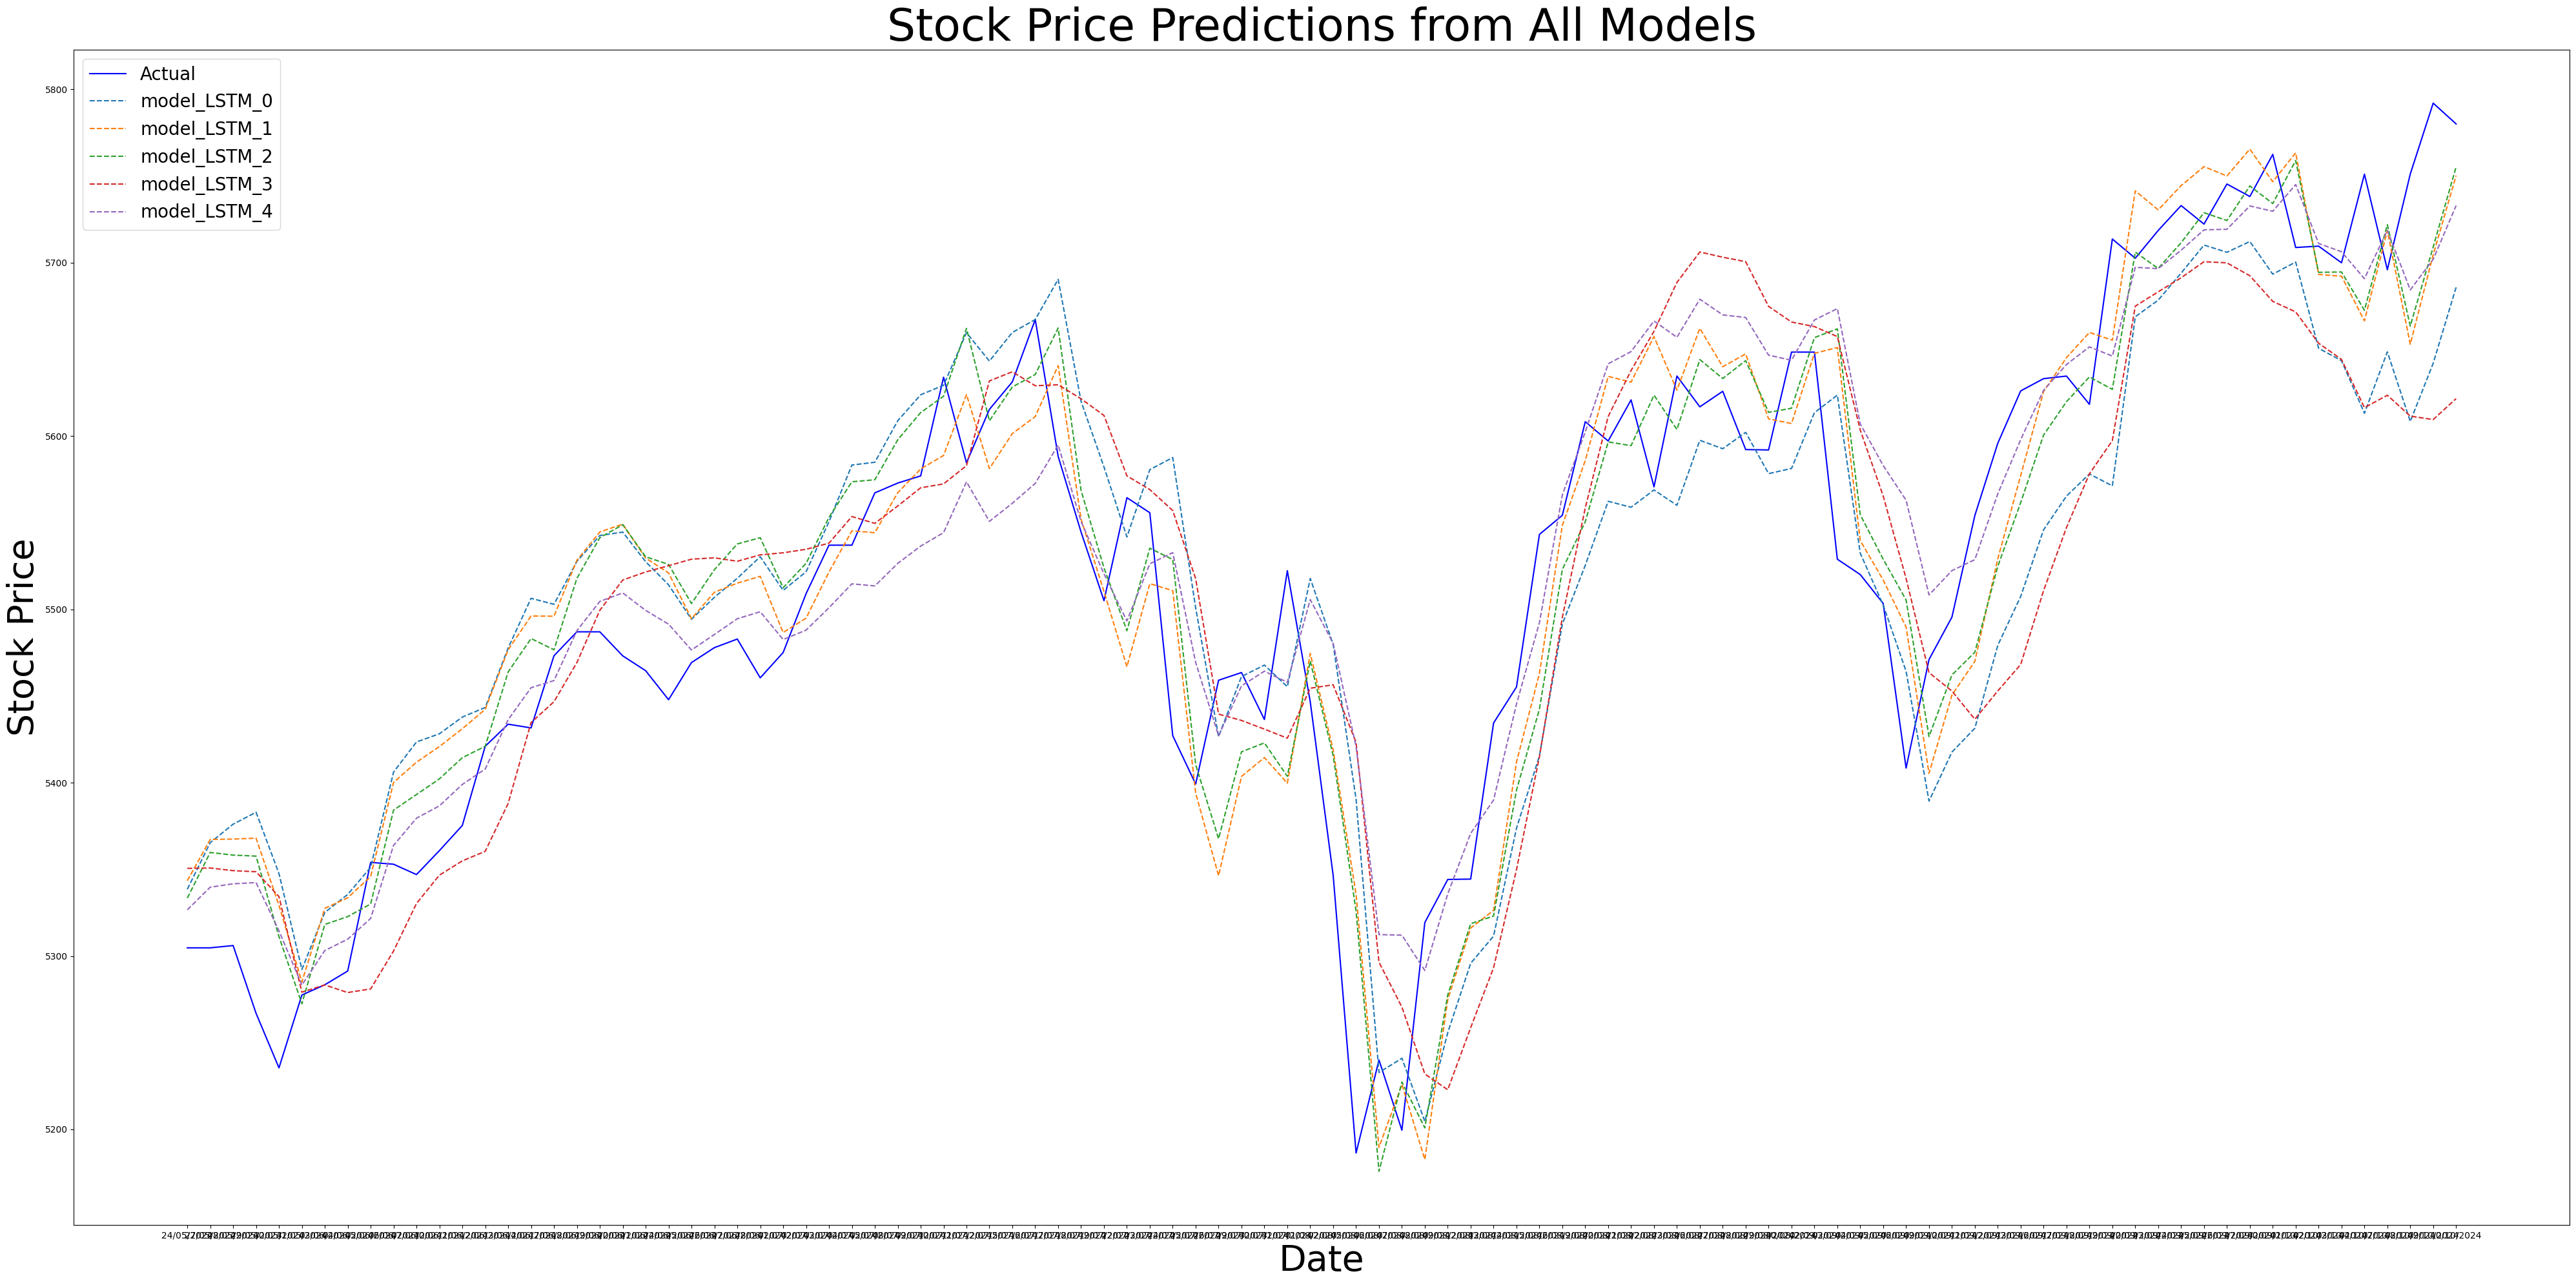

In [24]:
# Plot individual
zoom = 100
# Plot all combined
plt.figure(figsize=(40, 20))
plt.plot(model_LSTM.y_actual[-zoom:], label='Actual', color='blue')
for name, model_instance in model_instances.items():
    # Plot LSTM predictions vs. Actual values
    plt.plot(model_instance.y_pred[-zoom:], linestyle='--', label = name)
    
# Title and labels for the combined plot
plt.title('Stock Price Predictions from All Models', fontsize=50)
plt.xlabel('Date', fontsize=40)
plt.ylabel('Stock Price', fontsize=40)
plt.legend(loc="best", fontsize = 20)
plt.tight_layout()  # Adjust the layout to fit labels and titles
plt.show()


### Feature Analysis

    *Average SHAPley Performance (Forecasting)*

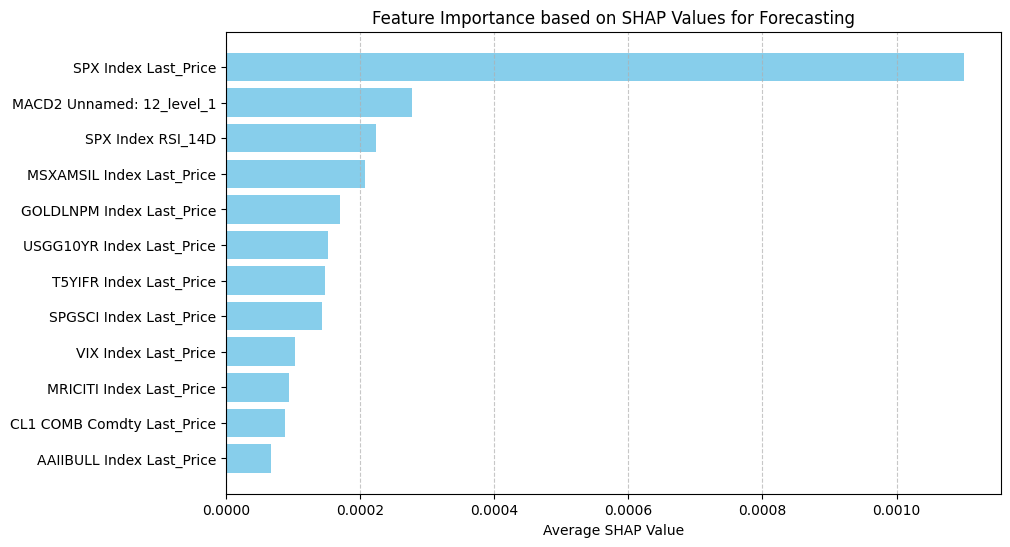

Level_0  SPX Index           USGG10YR Index MRICITI Index  VIX Index  \
Level_1 Last_Price   RSI_14D     Last_Price    Last_Price Last_Price   
0         0.000800  0.000208       0.000122      0.000084   0.000184   
1         0.000854  0.000215       0.000131      0.000089   0.000178   
2         0.000873  0.000206       0.000140      0.000096   0.000175   
3         0.000917  0.000212       0.000144      0.000103   0.000164   
4         0.000938  0.000209       0.000145      0.000104   0.000141   
5         0.000982  0.000217       0.000150      0.000106   0.000129   
6         0.001010  0.000228       0.000153      0.000111   0.000114   
7         0.001033  0.000212       0.000155      0.000104   0.000107   
8         0.001061  0.000221       0.000154      0.000105   0.000094   
9         0.001099  0.000223       0.000156      0.000099   0.000089   
10        0.001137  0.000225       0.000158      0.000096   0.000083   
11        0.001143  0.000229       0.000158      0.000098   0.000080   
12        0.001191  0.000243       0.000160      0.000098   0.000077   
13        0.001217  0.000233       0.000159      0.000089   0.000071   
14        0.001216  0.000228       0.000160      0.000089   0.000069   
15        0.001264  0.000239       0.000160      0.000085   0.000069   
16        0.001280  0.000241       0.000163      0.000085   0.000064   
17        0.001298  0.000229       0.000159      0.000079   0.000059   
18        0.001322  0.000225       0.000160      0.000083   0.000058   
19        0.001372  0.000238       0.000162      0.000077   0.000049   

Level_0 GOLDLNPM Index SPGSCI Index T5YIFR Index AAIIBULL Index  \
Level_1     Last_Price   Last_Price   Last_Price     Last_Price   
0             0.000147     0.000130     0.000097       0.000126   
1             0.000149     0.000144     0.000107       0.000122   
2             0.000146     0.000154     0.000111       0.000107   
3             0.000154     0.000159     0.000119       0.000090   
4             0.000148     0.000158     0.000122       0.000074   
5             0.000152     0.000163     0.000129       0.000061   
6             0.000155     0.000163     0.000134       0.000049   
7             0.000159     0.000163     0.000138       0.000042   
8             0.000162     0.000160     0.000143       0.000045   
9             0.000168     0.000159     0.000147       0.000053   
10            0.000174     0.000159     0.000153       0.000050   
11            0.000171     0.000153     0.000155       0.000050   
12            0.000176     0.000147     0.000162       0.000052   
13            0.000183     0.000142     0.000167       0.000059   
14            0.000178     0.000138     0.000171       0.000060   
15            0.000193     0.000131     0.000174       0.000069   
16            0.000192     0.000130     0.000179       0.000061   
17            0.000192     0.000115     0.000181       0.000062   
18            0.000196     0.000113     0.000185       0.000056   
19            0.000203     0.000105     0.000190       0.000069   

Level_0 MSXAMSIL Index CL1 COMB Comdty               MACD2  
Level_1     Last_Price      Last_Price Unnamed: 12_level_1  
0             0.000247        0.000102            0.000112  
1             0.000263        0.000112            0.000132  
2             0.000262        0.000121            0.000180  
3             0.000269        0.000123            0.000208  
4             0.000259        0.000121            0.000220  
5             0.000259        0.000123            0.000245  
6             0.000253        0.000121            0.000267  
7             0.000247        0.000116            0.000303  
8             0.000234        0.000108            0.000313  
9             0.000227        0.000101            0.000341  
10            0.000220        0.000095            0.000347  
11            0.000200        0.000093            0.000343  
12            0.000192        0.000085            0.000342  
13            0.000182   

In [22]:
# Average results
avg_SHAPley = pd.concat([model_instance.feature_contributions for model_instance in model_instances.values()]).groupby(level=0).mean()
model_LSTM.featureImportance(avg_SHAPley, pd.DataFrame())

# Check in detail
#pd.set_option('display.max_rows', None)
avg_SHAPley

    *Individual Model Feature Analysis (Forecasting)*

model_LSTM_0


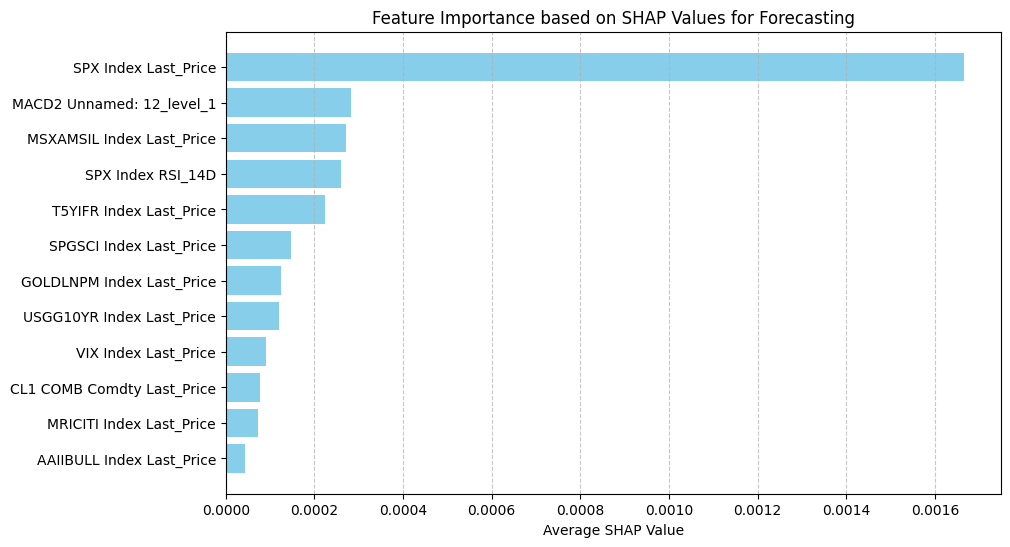

model_LSTM_1


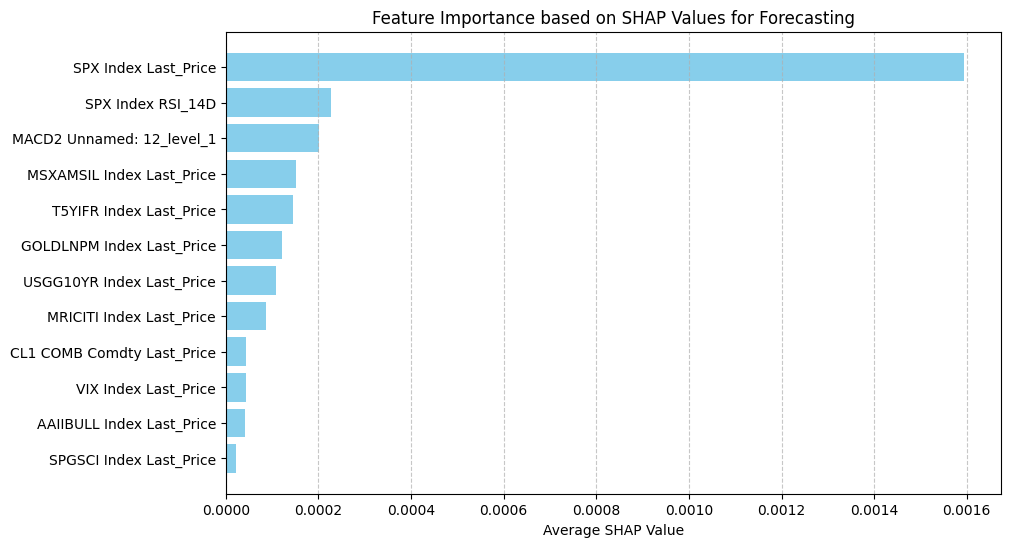

model_LSTM_2


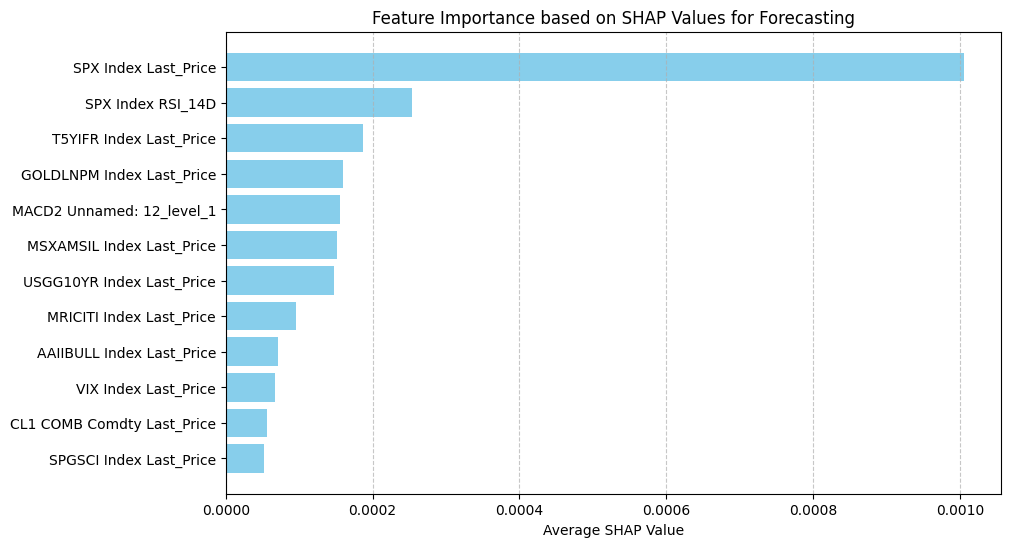

model_LSTM_3


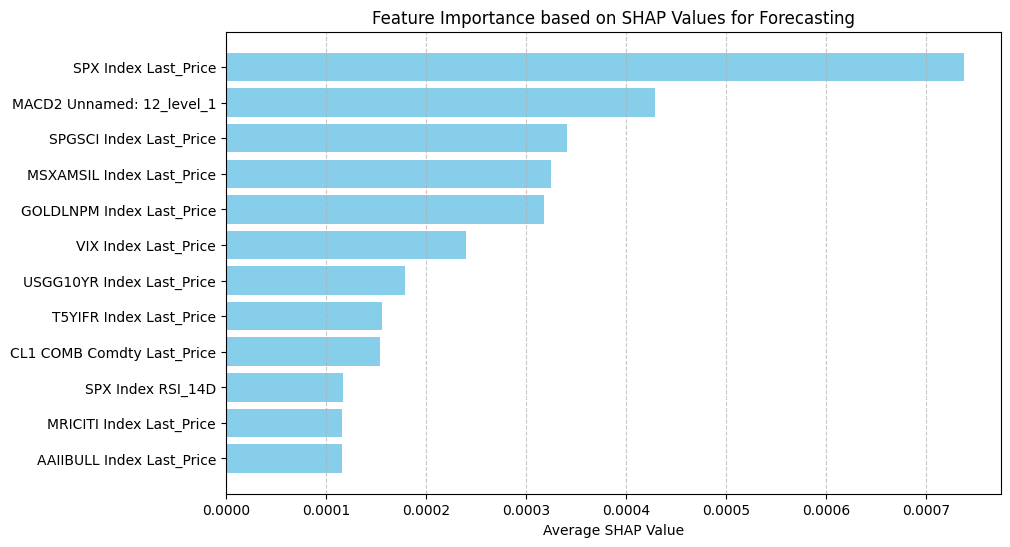

model_LSTM_4


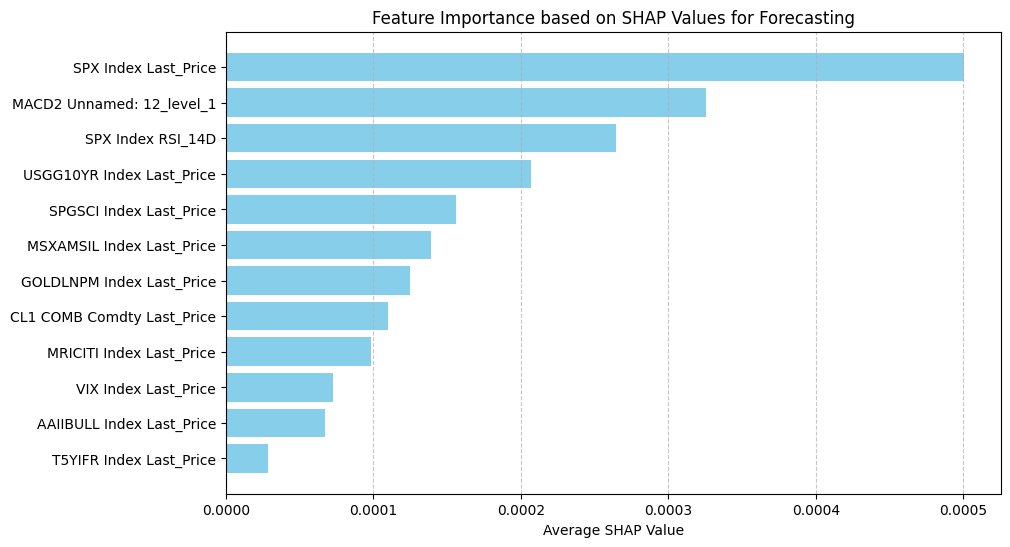

In [23]:
# Feature Importance - Look into - put into each 
for name in model_instances:   
    # Summary of validation set
    print(name)
    model_instances[name].featureImportance(model_instances[name].feature_contributions,
                                            pd.DataFrame())


In [49]:
# More Deatil Outlook
# Look into each time-step - maes are 'model_LSTM_i'
#pd.set_option('display.max_rows', None)
#name = 'model_LSTM_0'
#model_instances[name].feature_contributions

    *Get SHAPley values for each model (Training)*

In [50]:
# Feature Importance - Look into - put into each 
for name in model_instances:   
    # Summary of validation set
    print(name)
    model_instances[name].getSHAPley(hist_tick_data_Forecast.columns)
    model_instances[name].featureImportance(model_instances[name].feature_contributions_val,
                                            model_instances[name].feature_contributions_train)


model_LSTM_0


KeyboardInterrupt: 

In [64]:
# Look into each time-step in Detail- just put model into it always model_LSTM_i
#pd.set_option('display.max_rows', None)
#name = 'model_LSTM_0'
#model_instances[name].feature_contributions_val
#model_instances[name].feature_contributions_train

    *Average SHAPley Feature Contributions (Training)*

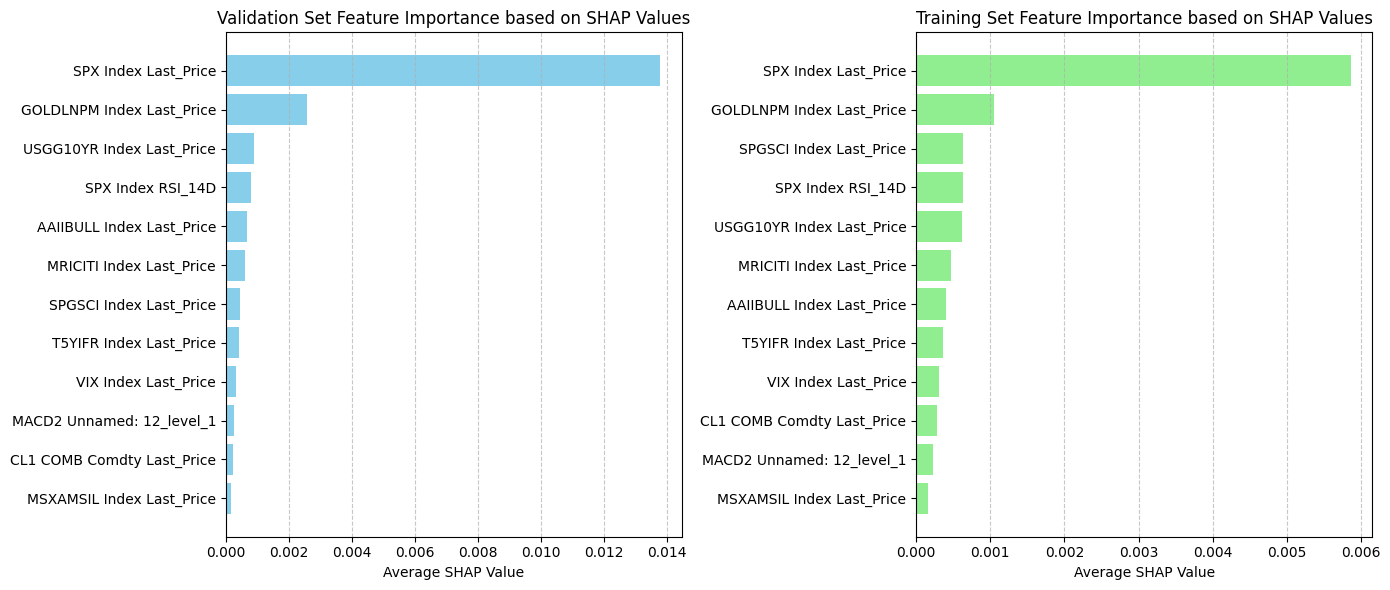

Level_0  SPX Index           USGG10YR Index MRICITI Index  VIX Index  \
Level_1 Last_Price   RSI_14D     Last_Price    Last_Price Last_Price   
0         0.012024  0.000522       0.000936      0.000708   0.000282   
1         0.012152  0.000578       0.000998      0.000698   0.000314   
2         0.011737  0.000575       0.001006      0.000713   0.000324   
3         0.012553  0.000643       0.001034      0.000723   0.000308   
4         0.011929  0.000751       0.000999      0.000728   0.000310   

Level_0 GOLDLNPM Index SPGSCI Index T5YIFR Index AAIIBULL Index  \
Level_1     Last_Price   Last_Price   Last_Price     Last_Price   
0             0.002628     0.000462     0.000445       0.000358   
1             0.002603     0.000486     0.000493       0.000343   
2             0.002514     0.000474     0.000498       0.000352   
3             0.002649     0.000495     0.000503       0.000343   
4             0.002543     0.000530     0.000477       0.000314   

Level_0 MSXAMSIL Index CL1 COMB Comdty               MACD2  
Level_1     Last_Price      Last_Price Unnamed: 12_level_1  
0             0.000067        0.000276            0.000274  
1             0.000069        0.000283            0.000311  
2             0.000061        0.000258            0.000301  
3             0.000055        0.000272            0.000312  
4             0.000062        0.000276            0.000328

In [65]:
# Average results
avg_val_SHAPley = pd.concat([model_instance.feature_contributions_val for model_instance in model_instances.values()]).groupby(level=0).mean()
avg_train_SHAPley = pd.concat([model_instance.feature_contributions_train for model_instance in model_instances.values()]).groupby(level=0).mean()
model_LSTM.featureImportance(avg_val_SHAPley, avg_train_SHAPley)

# Check in detail
#pd.set_option('display.max_rows', None)
avg_val_SHAPley.head()
#avg_train_SHAPley

### Validation Split Date

In [66]:
# Split Date
print(hist_tick_data_Forecast.index[model_LSTM.split_index])

28/03/2024
